In [1]:
import camb,os,struct,math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import gamma


# 读取参数
# Universe = '_2400_6144'
Path = '/mnt/18T/cube/usr_out/cbh/500_256/'
z = np.loadtxt(Path+'/code/z_checkpoint.txt');n_checkpoint = len(z);a = 1. / (1. + z);num_step = np.zeros(n_checkpoint)
Dir = '/image1/'
Redshift = '100.000'

plt.rcParams.update({
    'figure.figsize': (12, 8),
    'figure.facecolor': 'w',
    'figure.dpi': 300,
    'lines.linewidth': 1.0,
    'axes.spines.top': True,  # 显示顶部边框线
    'axes.spines.right': True,  # 显示右边边框线
    'xtick.bottom': True,  # 显示x轴刻度线
    'xtick.direction': 'in',  # x轴刻度线朝内
    'ytick.left': True,  # 显示y轴刻度线
    'ytick.direction': 'in',  # y轴刻度线朝内
    'xtick.top': True,  # 显示x轴刻度线（顶部）
    'ytick.right': True,# 显示y轴刻度线（右侧）
    'axes.linewidth': 1.0,
    'axes.xmargin': 0.03,
    'axes.ymargin': 0.03,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.grid': False,
    'axes.grid.which': 'both',
    # 'axes.grid.alpha': 0.5,
    'axes.labelpad': 8.0,
    'axes.labelsize': 10,
    'axes.labelcolor': 'k',
    'axes.axisbelow': True,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.minor.size': 2,
    'ytick.minor.size': 2,
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.minor.width': 1.0,
    'ytick.minor.width': 1.0,
    'font.family': 'serif',
    # 'font.serif': ['Times New Roman'],
    'font.size': 10,
    'text.usetex': False,
    'legend.fontsize': 12,
    'legend.frameon': False,
    'lines.markersize': 6,
    'axes.prop_cycle': plt.cycler('color', [[0, 0, 0], [1, 0.2, 0.2], [0.4, 0.7, 1], [0.2, 0.8, 0.3], [1, 0.7, 0.3], [0.6, 0.3, 1], [1, 0.7, 0.7], [0.5, 0.5, 0.5]])
})

def get_sim_info(prefix):
    sim = {}

    with open(prefix + 'info_1.bin', 'rb') as fid:
        sim['nplocal'] = struct.unpack('q', fid.read(8))[0]
        sim['npglobal'] = struct.unpack('q', fid.read(8))[0]

        sim['izipx'] = struct.unpack('q', fid.read(8))[0]
        sim['izipv'] = struct.unpack('q', fid.read(8))[0]

        sim['image'] = struct.unpack('q', fid.read(8))[0]

        sim['nn'] = struct.unpack('q', fid.read(8))[0]
        sim['nnt'] = struct.unpack('q', fid.read(8))[0]
        sim['nt'] = struct.unpack('q', fid.read(8))[0]
        sim['ncell'] = struct.unpack('q', fid.read(8))[0]
        sim['ncb'] = struct.unpack('q', fid.read(8))[0]

        sim['istep'] = struct.unpack('q', fid.read(8))[0]
        sim['cur_checkpoint'] = struct.unpack('q', fid.read(8))[0]
        sim['cur_halofind'] = struct.unpack('q', fid.read(8))[0]
        # sim['cur_powerpoint'] = struct.unpack('q', fid.read(8))[0]
        # sim['calculate_PK'] = struct.unpack('q', fid.read(8))[0]
        # sim['cic_iapm'] = struct.unpack('q', fid.read(8))[0]

        sim['a'] = struct.unpack('f', fid.read(4))[0]
        sim['t'] = struct.unpack('f', fid.read(4))[0]
        sim['tau'] = struct.unpack('f', fid.read(4))[0]
        sim['dt'] = struct.unpack('5f', fid.read(20))
        sim['mass_p'] = struct.unpack('f', fid.read(4))[0]
        # sim['m_nu'] = struct.unpack('3f', fid.read(12))[0]
        # sim['Mass_nu'] = struct.unpack('f', fid.read(4))[0]
        sim['box'] = struct.unpack('f', fid.read(4))[0]

        sim['h0'] = struct.unpack('f', fid.read(4))[0]
        sim['omega_m'] = struct.unpack('f', fid.read(4))[0]
        # sim['omega_nu'] = struct.unpack('f', fid.read(4))[0]
        sim['omega_l'] = struct.unpack('f', fid.read(4))[0]
        sim['s8'] = struct.unpack('f', fid.read(4))[0]
        sim['vsim2phys'] = struct.unpack('f', fid.read(4))[0]
        sim['sigma_vres'] = struct.unpack('f', fid.read(4))[0]
        sim['sigma_vi'] = struct.unpack('f', fid.read(4))[0]
        sim['z_i'] = struct.unpack('f', fid.read(4))[0]
        sim['vz_max'] = struct.unpack('f', fid.read(4))[0]

    sim['nc'] = sim['nt'] * sim['nnt']
    sim['ng_global'] = sim['nn'] * sim['nnt'] * sim['nt'] * 4
    G = 6.67408e-11  # in m^3 kg^-1 s^-2
    rho_crit = 30000 / 8 / 3.14159 / G / (3.086e19) ** 2  # in kg m^-3 h^-2
    rho_crit = rho_crit / 1.98855e30 * (3.086e22) ** 3  # in M_solar Mpc^-3 h^-2
    sim['mass_p_solar'] = rho_crit * sim['omega_m'] * sim['box'] ** 3 / sim['npglobal'] / sim['h0']
    sim['mass_p_solar_per_h'] = rho_crit * sim['omega_m'] * sim['box'] ** 3 / sim['npglobal']

    return sim

sim = get_sim_info(Path + Dir + Redshift + '_')
os.mkdir(Path+'/fig/') if not os.path.exists(Path+'/fig/') else None
    
ng = sim['ng_global']

# 输出参数
print('path      =  {:s}\nng_global =  {:d}\nbox       =  {:.1f}\nistep     =  {:d}\nmass_p    =  {:.1f}'.\
      format(Path,sim['ng_global'],sim['box'],sim['istep'],sim['mass_p_solar']))

colors = np.array([
    ("#FF6347", "#FFA07A"),  # 番茄色和浅鲑鱼色
    ("#FF4500", "#FF8C00"),  # 橙红色和深橙色
    ("#2E8B57", "#3CB371"),  # 海洋绿和中海洋绿
    ("#4169E1", "#87CEFA"),  # 皇家蓝和淡天蓝色
    ("#800080", "#E6E6FA"),  # 紫色和薰衣草色
    ("#FFC0CB", "#FFB6C1"),  # 粉红色和浅粉红色
    ("#FA8072", "#F08080"),  # 鲑鱼色和浅珊瑚色
    ("#6A5ACD", "#9370DB"),  # 石板蓝和中紫色
    ("#7B68EE", "#8A2BE2"),  # 中的士兰色和蓝紫色
    ("#4682B4", "#B0C4DE")   # 钢蓝色和亮钢蓝色
])

# 加载功率谱
def loadpower(filename):
    # print('load '+filename)
    n_row_xi = 10
    fid = open(filename, 'rb')  # 以二进制模式打开文件

    xi = np.fromfile(fid, dtype='float32')  # 读取数据到一维数组
    fid.close()

    xi = np.reshape(xi, (int(len(xi) / n_row_xi), n_row_xi))  # 重新形状为二维数组
    ksim = xi[:, 1]  # 提取第二列作为 ksim

    return ksim, xi

# 计算红移处的功率谱
def cambpower(z,mnus,camb_var='delta_nonu'):
    #set cosmology parm
    H0=70.0
    ombh2=0.0463*(H0/100)**2
    omch2=0.2327*(H0/100)**2
    omk=0.0
    neutrino_hierarchy='degenerate'
    num_massive_neutrinos=3
    nnu=3.044
    standard_neutrino_neff=3.044
    ns=0.972
    As=2.6025e-09
    nbin = 500
    kmin = 1e-5
    kmax = 1e2

    # 创建CAMB参数对象
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, omk=omk, neutrino_hierarchy=neutrino_hierarchy, num_massive_neutrinos=0, mnu=0, nnu=nnu, standard_neutrino_neff=standard_neutrino_neff)
    pars.omch2=pars.omch2-pars.omnuh2
    pars.InitPower.set_params(As=As,ns=ns)
    pars.set_matter_power(redshifts=[z], kmax=kmax, nonlinear=True)
    pars.NonLinear = camb.model.NonLinear_none
    results = camb.get_results(pars)
    k, zout,pk_l  = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=nbin,var1=camb_var,var2=camb_var)
    pars.NonLinear = camb.model.NonLinear_both
    results = camb.get_results(pars)
    k, zout,pk_nl = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=nbin,var1=camb_var,var2=camb_var)
    pk = [pk_l[0],pk_nl[0]]

    pk_nus = [[],[]]
    dpk = [[],[]]
    for mnu_info in mnus:
        # 创建CAMB参数对象
        pars = camb.CAMBparams()
        pars = camb.CAMBparams()
        mnu,neutrino_hierarchy=mnu_info
        if neutrino_hierarchy=='inverted':
            NumMassiveNeutrinos = 2
        else:
            NumMassiveNeutrinos = 3
        pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, omk=omk, neutrino_hierarchy=neutrino_hierarchy, num_massive_neutrinos=NumMassiveNeutrinos, mnu=mnu, nnu=nnu, standard_neutrino_neff=standard_neutrino_neff)
        pars.omch2=pars.omch2-pars.omnuh2
        pars.InitPower.set_params(As=As,ns=ns)
        pars.set_matter_power(redshifts=[z], kmax=kmax, nonlinear=True)
        pars.NonLinear = camb.model.NonLinear_none
        results = camb.get_results(pars)
        k, zout,pk_nu = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=nbin,var1=camb_var,var2=camb_var)
        pk_nus[0].append(pk_nu[0])
        dpk[0].append(pk_nu[0]/pk_l[0]-1)
        pars.NonLinear = camb.model.NonLinear_both
        results = camb.get_results(pars)
        k, zout,pk_nu = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=nbin,var1=camb_var,var2=camb_var)
        pk_nus[1].append(pk_nu[0])
        dpk[1].append(pk_nu[0]/pk_nl[0]-1)

    return k,np.array(pk),np.array(pk_nus),np.array(dpk)

def plot_power_spectra(Redshift, Pk_sets,ncol,TITLE=None):
    """
    绘制给定红移下的功率谱及其相对变化，并返回所有数据。
    
    参数:
    - Redshift: 红移值
    - Pk_sets: 三维列表，每一对是一个列表，包含两个子列表，每个子列表包含路径、中微子质量、盒子大小、格点数、颜色、线型、线宽等信息
    
    返回:
    - all_k_sim: 所有k_sim数据的列表
    - all_xi_sim: 所有xi_sim数据的列表
    """
    def power_error(k,pk,k_camb,pk_camb):
        
        # print(np.array(k_camb).shape,np.array(pk_camb).shape)
        n=np.array(pk[:,0])
        lower = gamma.ppf(0.1587, a=n, scale=1/n)
        upper = gamma.ppf(0.8413, a=n, scale=1/n)

        interp_camb = interp1d(k_camb,pk_camb, kind='linear', bounds_error=False, fill_value="extrapolate")
        pk_i = interp_camb(k)

        return pk_i,pk_i*upper,pk_i*lower

    def read_info(set_info):
        if len(set_info) == 10:
            path, mnu, box, ng, flag, color, linestyle, linewidth, plot_err,hierarchy = set_info
            if hierarchy == 'NH':
                hierarchy='normal'
            elif hierarchy == 'IH':
                hierarchy='inverted'
            else:
                exit("Hierarchy error")
        elif len(set_info) == 9:
            path, mnu, box, ng, flag, color, linestyle, linewidth, plot_err = set_info
            hierarchy='degenerate'
        elif len(set_info) == 8:
            path, mnu, box, ng, flag, color, linestyle, linewidth = set_info
            plot_err = False
            hierarchy='degenerate'
        else:
            raise ValueError("Invalid number of parameters provided")
        mnu_info = [mnu,hierarchy]
        return path, mnu_info, box, ng, flag, color, linestyle, linewidth, plot_err

    # 创建一个新的图形实例
    fig = plt.figure(figsize=(10, 8))

    # 定义网格布局，高度比例为3:1，垂直间距很小
    gs = GridSpec(2, 1, height_ratios=[2, 1], hspace=0.05)

    # 添加第一个子图，占据上部3/4的高度
    ax1 = fig.add_subplot(gs[0])

    # 添加第二个子图，占据下部1/4的高度，且共享x轴
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # 隐藏第一个子图的x轴刻度标签
    plt.setp(ax1.get_xticklabels(), visible=False)


    # 检查文件
    for set_info in Pk_sets:
        for path_info in set_info:
            path = path_info[0]
            if path == 'CAMB':
                pass
            # elif path == 'CAMB_nu':
            #     pass
            else:
                if (not os.path.exists(path  + Dir + Redshift +  '_cicpower_1.bin')):
                    print(f"The file {path  + Dir + Redshift +  '_cicpower_1.bin'} does not exist.")
                    return 0,0


    # CAMB功率谱
    mnus = []
    for set_info in Pk_sets:
        path, mnu, box, ng, flag, color, linestyle, linewidth, plot_err=read_info(set_info[1])
        if mnu not in mnus and mnu[0] != 0 :
            mnus.append(mnu)
    mnus = sorted(mnus, key=lambda x: x[0])
    print(mnus)
    var = 'delta_nonu'
    if ncol == 5:
        var = 'delta_tot'
    elif ncol == 6:
        var = 'delta_nu'
    k, pk, pk_nu, dpk = cambpower(float(Redshift),mnus,var)

    if TITLE is None:
        if ncol == 5:
            kind = 'tot'
        elif ncol == 6:
            kind = 'nu'
        else:
            kind = 'cdm'
        if len(mnus) == 2 :
            TITLE = r'$z={'+Redshift+r'}\,\,\,\,power_{{'+kind+r'}}\,\,\,\,m\nu={'+str(max([row[0] for row in mnus]))+r'}$'
        else:
            TITLE = r'$z={'+Redshift+r'}\,\,\,\,power_{{'+kind+r'}}$'

    # 加载功率谱
    all_k_sim = []
    all_xi_sim = []
    min_k = []
    max_k = []

    for set_info in Pk_sets:
        for path_info in set_info:
            path, mnu, box, ng, flag, color, linestyle, linewidth, plot_err=read_info(path_info)
            if path == 'CAMB':
                path_info[1:] = set_info[1][1:]
                path, mnu, box, ng, flag, color, linestyle, linewidth, plot_err=read_info(path_info)
                if (mnu[0] == 0):
                    print(mnu)
                    k_sim, xi_sim = k, np.array([list(pk[1])]*10).T
                else:
                    index = [index for index, sublist in enumerate(mnus) if sublist == mnu][0]
                    # print(index,pk_nu.shape)
                    # print(mnus[index],mnu)
                    # print(pk_nu[1,index])
                    k_sim, xi_sim = k, np.array([list(pk_nu[1,index])]*10).T
                    
            else:
                k_sim, xi_sim = loadpower(path  + Dir + Redshift +  '_cicpower_1.bin')
                max_k.append(np.max(k_sim))
                min_k.append(np.min(k_sim))
            all_k_sim.append(k_sim)
            all_xi_sim.append(xi_sim)


    ax1.loglog(k, pk[1]     , '--', linewidth=5, label=r'$CAMB_{{NonLinear}}\,{M_{\nu}:0.0}$'           , color=[.7, .7, .7])
    for i, set_info in enumerate(Pk_sets):
        path, mnu, box, ng, flag, color, linestyle, linewidth, plot_err = read_info(set_info[0])
        if (path == 'CAMB'):
            ax1.loglog(0, 0, label=' ')
        else:
            title = '{%s %s M_{\\nu}:%s,box:%d,ng:%d}'%(flag, r'\,', str(mnu).replace("'",""), box, ng)
            ax1.loglog(all_k_sim[i*2], all_xi_sim[i*2][:, ncol], linestyle, linewidth=linewidth, color=color, label='$Pk_{%s}(k)$'%title)
            if (plot_err): 
                _,pk_u,pk_l = power_error(all_k_sim[i*2], all_xi_sim[i*2],k, pk[1])
                ax1.fill_between(all_k_sim[i*2], pk_u, pk_l, color=color, alpha=0.2)

    for imnu in mnus:
        j = [i for i, item in enumerate(mnus) if item == imnu][0]
        ax1.loglog(k, pk_nu[1,j], '-.', linewidth=5, label=r'$CAMB_{{NonLinear}}\,{M_{\nu}:'+str(imnu).replace("'","")+r'}$', color=[.5*(1-imnu[0]), 3*imnu[0], .7], alpha=0.5)
        for i, set_info in enumerate(Pk_sets):
            path, mnu, box, ng, flag, color, linestyle, linewidth, plot_err = read_info(set_info[1])
            if (mnu == imnu):
                if (path != 'CAMB'):
                    title = '{%s %s M_{\\nu}:%s,box:%d,ng:%d}'%(flag, r'\,', str(mnu).replace("'",""), box, ng)
                    ax1.loglog(all_k_sim[i*2+1], all_xi_sim[i*2+1][:, ncol], linestyle, linewidth=linewidth, color=color, label='$Pk_{%s}(k)$'%title)
                if (plot_err): 
                    _,pk_u,pk_l = power_error(all_k_sim[i*2+1], all_xi_sim[i*2+1],k, pk_nu[1,j])
                    ax1.fill_between(all_k_sim[i*2+1], pk_u, pk_l, color=color, alpha=0.2)
            else:
                ax1.loglog(0, 0, label=' ')
        

    # 设置第一个子图的样式
    ax1.grid(True, which='both', linewidth=0.3)
    ax1.set_xlim([np.min(min_k)/1.2, np.max(max_k)*1.2])
    ax1.set_ylim([1e-4, 5e5])
    ax1.set_ylabel('$P(k)$')
    # ax1.legend(loc='lower left', ncol=len(mnus[0,:]),fontsize=30/len(mnus[0,:]))


    # 获取图例句柄和标签
    handles, labels = ax1.get_legend_handles_labels()

    # 创建图例
    legend = ax1.legend(handles, labels, loc='lower left', ncol=len(mnus)+1,fontsize=min(30/(len(mnus)+1),8))

    # # 设置空标签的颜色为透明
    # for handle, label in zip(legend.legendHandles, labels):
    #     if label.strip() == '':
    #         handle.set_color('none')  # 设置线条颜色为透明
    #         handle.set_markerfacecolor('none')  # 设置标记颜色为透明
    #         handle.set_markeredgecolor('none')  # 设置标记边框颜色为透明

    ax1.set_title(TITLE)
    ax1.spines['top'].set_visible(True)
    ax1.spines['right'].set_visible(True)

    # 计算并绘制相对变化
    ax2.loglog(k, np.zeros(len(k)), linewidth=2, alpha=0.2)
    for mnu in mnus:
        index = [index for index, sublist in enumerate(mnus) if sublist == mnu][0]
        ax2.loglog(k, dpk[1,index], '-.', label=r'$\Delta_{{Pk_{{'+str(mnu).replace("'","")+r'/0.0}}CAMB_{{NonLinear}}}}$', linewidth=3, alpha=0.4)
    
    # 计算并绘制成对的功率谱之间的相对误差
    err_line = True
    for i, set_info in enumerate(Pk_sets):
        path1, mnu1, box, ng, flag1, _, _, _,_ = read_info(set_info[0])
        path2, mnu2, box, ng, flag2, color, linestyle, linewidth ,plot_err= read_info(set_info[1])
        if np.array_equal(all_k_sim[i*2], all_k_sim[i*2+1]):
            k_sim = all_k_sim[i*2]
            dpk_set = (all_xi_sim[i*2+1][:, ncol])/(all_xi_sim[i*2][:, ncol]) - 1
        else:
            k_sim = np.exp(np.linspace(np.log(max(np.min(all_k_sim[i*2]),np.min(all_k_sim[i*2+1]))), np.log(min(np.max(all_k_sim[i*2]),np.max(all_k_sim[i*2+1]))), 100))
            xi_sim0 = np.zeros((100, 10))
            xi_sim1 = np.zeros((100, 10))
            xi_sim0[:, ncol] = interp1d(all_k_sim[i*2],all_xi_sim[i*2][:, ncol], kind='linear', bounds_error=False, fill_value="extrapolate")(k_sim)
            xi_sim1[:, ncol] = interp1d(all_k_sim[i*2+1],all_xi_sim[i*2+1][:, ncol], kind='linear', bounds_error=False, fill_value="extrapolate")(k_sim)
            xi_sim0[:, 0] = interp1d(all_k_sim[i*2],all_xi_sim[i*2][:, 0], kind='linear', bounds_error=False, fill_value="extrapolate")(k_sim)
            xi_sim1[:, 0] = interp1d(all_k_sim[i*2+1],all_xi_sim[i*2+1][:, 0], kind='linear', bounds_error=False, fill_value="extrapolate")(k_sim)
            dpk_set = xi_sim1[:, ncol]/xi_sim0[:, ncol] - 1
        
        # if (path1 == 'CAMB'):
        #     title1 = '{%s %s M_{\\nu}:%s,box:%d,ng:%d}'%(flag2, r'\,', str(mnu2).replace("'",""), box, ng)
        #     j = [i for i, item in enumerate(mnus) if item == mnu2][0]
        #     pk,upper_error_i,lower_error_i = power_error(k_sim, xi_sim0,k, pk_nu[1,j])
        #     # lower_error_i = interp1d(all_k_sim[i*2+1],pk_l, kind='linear', bounds_error=False, fill_value="extrapolate")
        #     # upper_error_i = interp1d(all_k_sim[i*2+1],pk_u, kind='linear', bounds_error=False, fill_value="extrapolate")
        #     ax2.fill_between(k_sim, lower_error_i/xi_sim0(k_sim) - 1, upper_error_i/xi_sim0(k_sim) - 1, color=color, alpha=0.2)
        #     ax2.loglog(k_sim, dpk_set, linestyle, linewidth=linewidth, color=color, label=r'$\Delta_{{Pk_{{('+title+r')/(CAMB)}}}}$', alpha=0.6)
            
        #     if err_line:
        #         ax2.loglog(k, np.ones(len(k))*0.01,'--',color='g',linewidth=1, alpha=0.2,label='1%')
        #         ax2.loglog(k, -np.ones(len(k))*0.01,'--',color='g', linewidth=1, alpha=0.2)
        #         ax2.loglog(k, np.ones(len(k))*0.05,'--',color='r',linewidth=1, alpha=0.2,label='5%')
        #         ax2.loglog(k, -np.ones(len(k))*0.05,'--',color='r', linewidth=1, alpha=0.2)
        #         err_line =  False
        # else:
        title1 = '{%s %s M_{\\nu}:%s,box:%d,ng:%d}'%(flag1, r'\,', str(mnu1).replace("'",""), box, ng)
        title2 = '{%s %s M_{\\nu}:%s,box:%d,ng:%d}'%(flag2, r'\,', str(mnu2).replace("'",""), box, ng)
        ax2.loglog(k_sim, dpk_set, linestyle, linewidth=linewidth, color=color, label=r'$\Delta_{{Pk_{{('+title2+r')/('+title1+r')}}}}$', alpha=0.6)


    # 设置第二个子图的样式
    ax2.set_yscale('linear')
    ax1.set_xlim([np.min(min_k)/1.2, np.max(max_k)*1.2])
    if (err_line == False): 
        ax2.set_ylim([-0.3, 0.3])
    else:
        ax2.set_ylim([-1.2*np.max(max([row[0] for row in mnus])), 0.05])
    # ax2.set_ylim([-0.002, 0.002])
    # ax2.set_ylim([-0.8, 0.3])
    ax2.grid(True, which='both', linewidth=0.5)
    ax2.set_xlabel(r'$k\,[h/{{ Mpc}}]$')
    ax2.set_ylabel(r'$\Delta_{{Pk}}$')
    ax2.legend(loc='lower left',fontsize=30/(len(mnus)+1))
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)

    # 显示图形
    plt.show()
    return all_k_sim, all_xi_sim


path      =  /mnt/18T/cube/usr_out/cbh/500_256/
ng_global =  256
box       =  500.0
istep     =  0
mass_p    =  824225543892.5


In [ ]:
# 绘制2D投影密度图

def loadfield2d(fn):
    # 打开文件
    fid = open(fn, 'rb')  # 使用二进制模式打开文件

    # 读取数据
    p1 = np.fromfile(fid, dtype='float32')  # 使用 float32 数据类型读取数据

    # 关闭文件
    fid.close()

    # 重新形状为二维数组
    n = int(np.sqrt(len(p1)))
    a = np.reshape(p1, (n, n))

    return a

def plt_proj(Redshift):
    proj_xy = loadfield2d(Path + Dir + Redshift + '_proj_xy_1.bin')
    plt.figure()
    plt.imshow(proj_xy.T, cmap='RdBu')

    # 添加上边和右边的坐标轴
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    # 
    plt.colorbar()
    plt.clim(-1, 2)
    plt.title('$z='+str(Redshift)+'\,\,\,\,\delta_c$')

    savename = Path+'/fig/'+'proj_'+str(Redshift)+'_xy.jpg'
    plt.savefig(savename, format='jpeg')
    plt.show()

Redshift_i = ['0.000']
# for i in np.linspace(10,90,17):
#     Redshift = "{:.3f}".format(z[int(i)-1])
for Redshift in Redshift_i:
    plt_proj(Redshift)


<>:73: SyntaxWarning: invalid escape sequence '\,'
<>:76: SyntaxWarning: invalid escape sequence '\,'
<>:90: SyntaxWarning: invalid escape sequence '\,'
<>:73: SyntaxWarning: invalid escape sequence '\,'
<>:76: SyntaxWarning: invalid escape sequence '\,'
<>:90: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_24483/1897802534.py:73: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$k\,[h/{ Mpc}]$')
/tmp/ipykernel_24483/1897802534.py:76: SyntaxWarning: invalid escape sequence '\,'
  plt.title('$z='+str(Redshift)+'\,\,\,\,power_{mater}$')
/tmp/ipykernel_24483/1897802534.py:90: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$k\,[h/{ Mpc}]$')


(219, 2)
[0.0001, 0.00010654251289712623, 0.00011351307054434311, 0.00012093967782463074, 0.0001288521718440501, 0.00013728234180517432, 0.0001462640567232548, 0.00015583340149823375, 0.00016602882188928618, 0.00017689127897433944, 0.00018846441371512713, 0.00020079472228893265, 0.00021393174289143486, 0.00022792825476115392, 0.00024284049022509714, 0.0002587283606175187, 0.00027565569697944305, 0.0002936905065059864, 0.0003129052457717758, 0.00033337711183217876, 0.00035518835236986597, 0.0003784265961327546, 0.00040318520499089586, 0.00042956364902673, 0.0004576679061656699, 0.0004876108879525664, 0.0005195128931846548, 0.0005535020912234945, 0.000589715036927655, 0.0006282972192749393, 0.0006694036458782879, 0.0007131994657437078, 0.0007598606327722254, 0.000809574612671533, 0.000862541136117428, 0.0009189730011909297, 0.0009790969283149543, 0.0010431544711253268, 0.0011114029869356504, 0.0011841166706949614, 0.0012615876565922007, 0.0013441271917332984, 0.0014320668866062297, 0.001

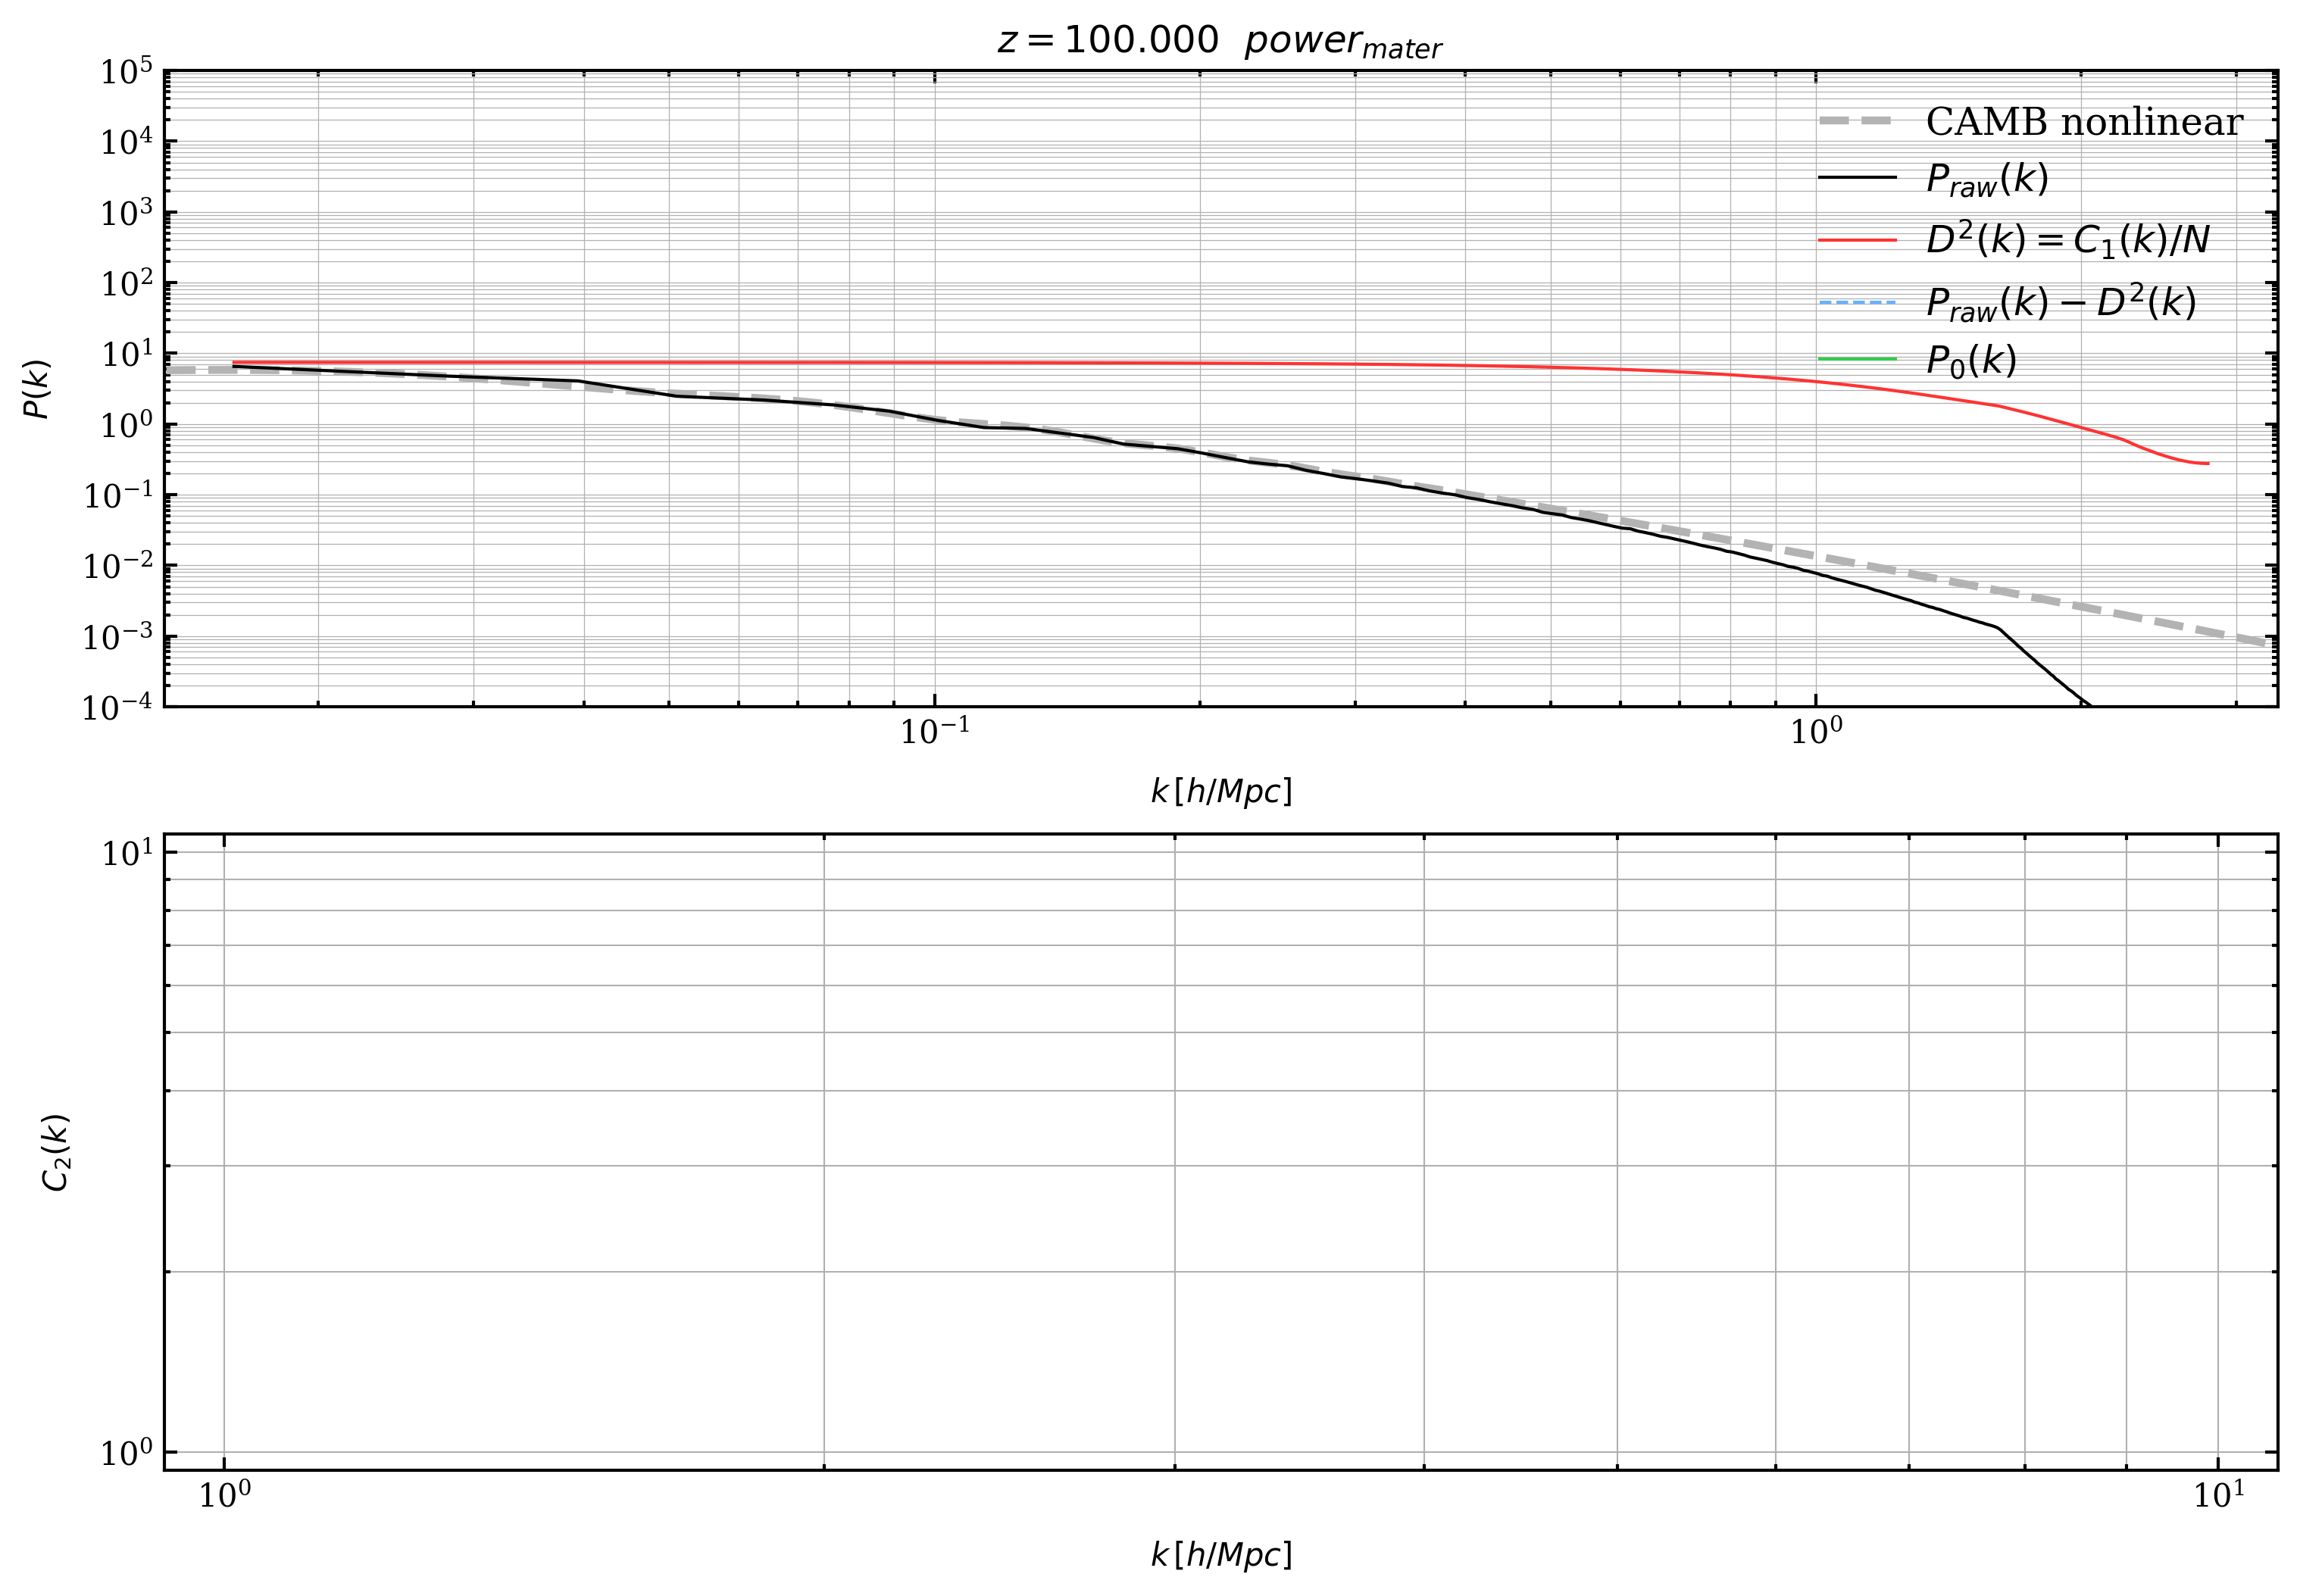

(219, 2)
[0.0001, 0.00010654251289712623, 0.00011351307054434311, 0.00012093967782463074, 0.0001288521718440501, 0.00013728234180517432, 0.0001462640567232548, 0.00015583340149823375, 0.00016602882188928618, 0.00017689127897433944, 0.00018846441371512713, 0.00020079472228893265, 0.00021393174289143486, 0.00022792825476115392, 0.00024284049022509714, 0.0002587283606175187, 0.00027565569697944305, 0.0002936905065059864, 0.0003129052457717758, 0.00033337711183217876, 0.00035518835236986597, 0.0003784265961327546, 0.00040318520499089586, 0.00042956364902673, 0.0004576679061656699, 0.0004876108879525664, 0.0005195128931846548, 0.0005535020912234945, 0.000589715036927655, 0.0006282972192749393, 0.0006694036458782879, 0.0007131994657437078, 0.0007598606327722254, 0.000809574612671533, 0.000862541136117428, 0.0009189730011909297, 0.0009790969283149543, 0.0010431544711253268, 0.0011114029869356504, 0.0011841166706949614, 0.0012615876565922007, 0.0013441271917332984, 0.0014320668866062297, 0.001

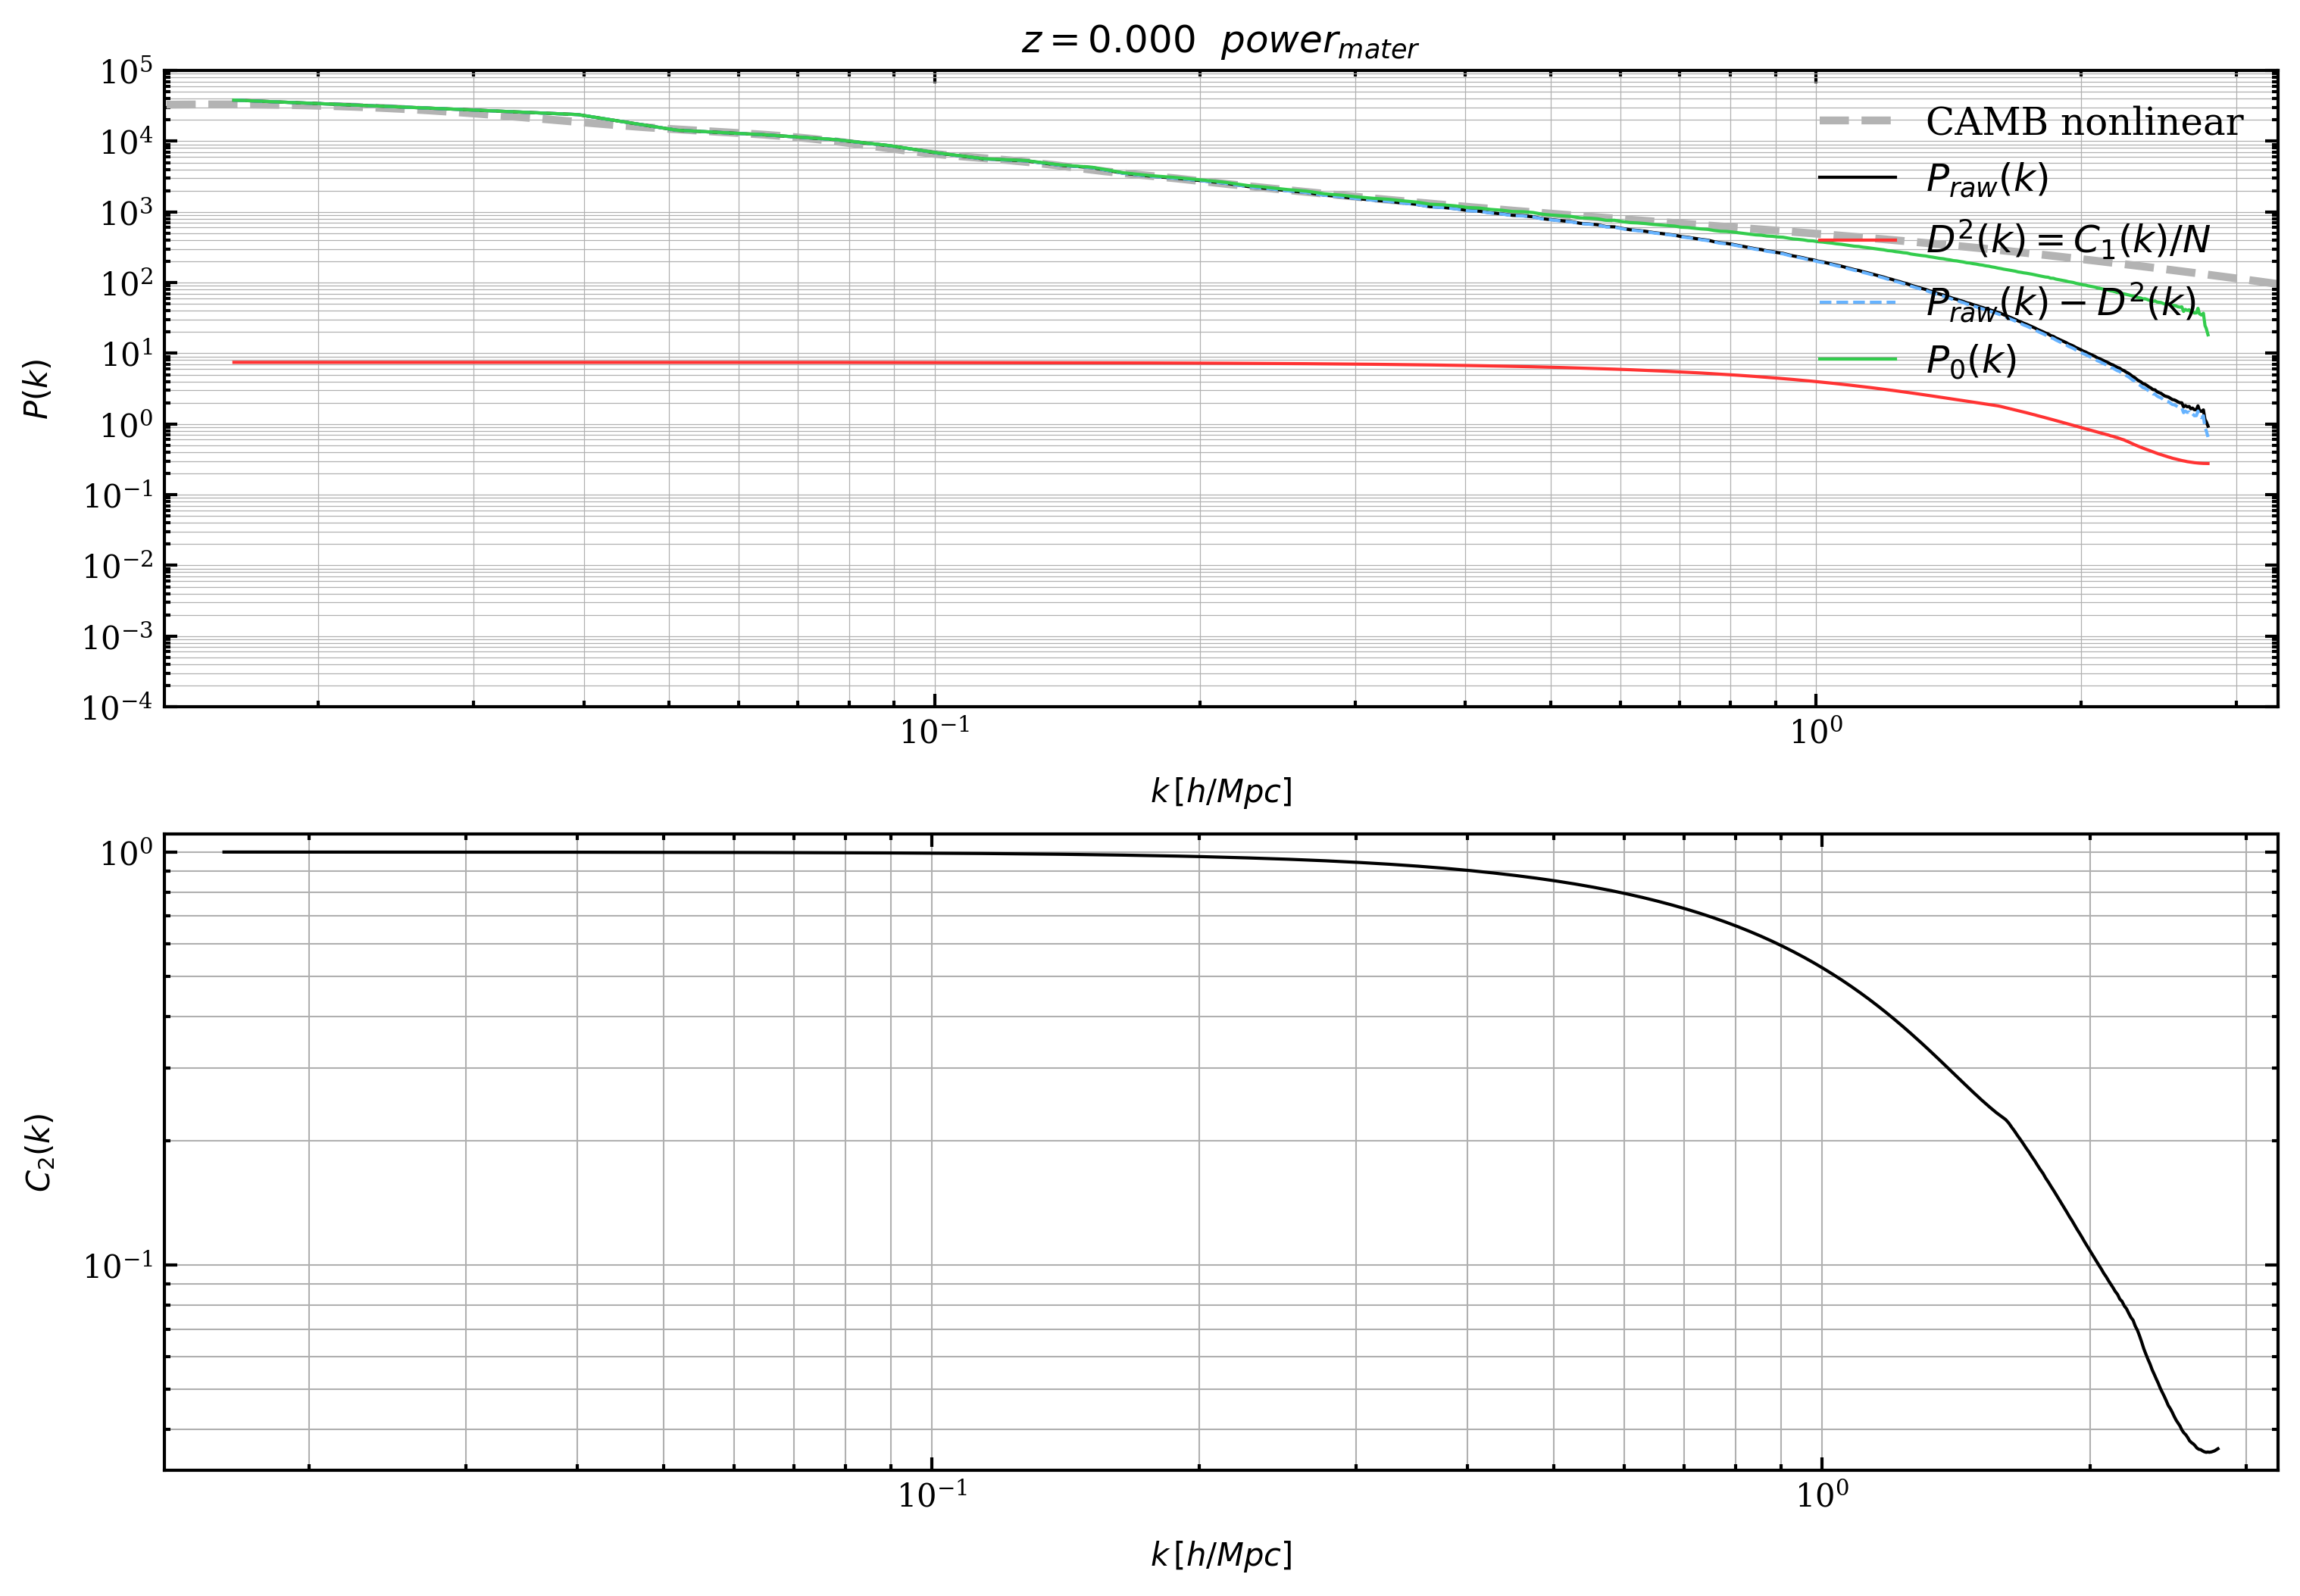

In [10]:
# 绘制功率谱

# 加载功率谱
def loadpower(filename):
    print(filename)
    n_row_xi = 10
    fid = open(filename, 'rb')  # 以二进制模式打开文件

    xi = np.fromfile(fid, dtype='float32')  # 读取数据到一维数组
    fid.close()

    xi = np.reshape(xi, (int(len(xi) / n_row_xi), n_row_xi))  # 重新形状为二维数组
    ksim = xi[:, 1]  # 提取第二列作为 ksim

    return ksim, xi

# # 计算红移处的功率谱
# def cambpower(z):
#     # 定义参数
#     h0  = sim['h0']
#     h02 = h0**2
#     H0 = h0*100  # 哈勃常数
#     ombh2 = (0.04630)*h02  # 普通物质的物质密度参数
#     omch2 = (sim['omega_m']-sim['omega_nu']-0.04630)*h02  # 冷暗物质的物质密度参数
#     omk = 0.0  # 曲率密度参数
#     mnu = sim['Mass_nu']
#     neutrino_hierarchy='degenerate'
#     num_massive_neutrinos=3
#     nnu = 3.044
#     standard_neutrino_neff=3.044
#     kmax = 200.0  # 最大k值


#     # 创建CAMB参数对象
#     pars = camb.CAMBparams()
#     pars.set_cosmology(H0=h0*100, ombh2=ombh2, omch2=omch2, omk=omk, neutrino_hierarchy=neutrino_hierarchy, num_massive_neutrinos=num_massive_neutrinos, mnu=mnu, nnu=nnu, standard_neutrino_neff=standard_neutrino_neff)
#     pars.omch2=omch2-pars.omnuh2
#     pars.InitPower.set_params(As=2.6025e-09,ns=0.972)
#     pars.set_matter_power(redshifts=[z], kmax=kmax, nonlinear=True)
#     pars.NonLinear = camb.model.NonLinear_both

#     # 计算功率谱
#     # print(pars)
#     results = camb.get_results(pars)
#     k, zout,pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=kmax, npoints=100,var1='delta_nonu',var2='delta_nonu')
#     s_8 = results.get_sigma8()
#     return k,pk,s_8

# 绘制功率谱
def plt_power(Redshift):
    # cam = np.loadtxt('/home/cbh/cube_nu/tf_wmap9/camb_82031666_matterpower_z0.dat.txt')
    # k,pk,s_8 = cambpower(float(Redshift))
    data = np.loadtxt(fname=Path+f'/IC/Pcb_{float(Redshift):.4f}.txt')
    print(data.shape)
    k = data[:,0].tolist()
    print(k)
    pk = [data[:,1].tolist()]
    ksim, xi = loadpower(Path + Dir + Redshift + '_cicpower_1.bin')
    # k,pk = loadpower(Path + Dir + Redshift + '_power_tile_1.bin')
    print(len(k),len(ksim),len(pk[0]),len(xi))

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.loglog(k, pk[0], '--', linewidth=2.5, color=[.7, .7, .7])
    # plt.loglog(k, pk[:, 2], '--', linewidth=2.5, color=[.7, .7, .7])
    # plt.loglog(cam[:,0], cam[:,1], '--', linewidth=1.5, color=[.3, .3, .3])
    # xi34 = xi[:, 3] - xi[:, 4]
    print(max(ksim),min(ksim),len(ksim))
    plt.loglog(ksim, xi[:, 2], ksim, xi[:, 2] - xi[:, 3] , ksim, xi[:, 3], '--', ksim, xi[:, 4])
    plt.grid(True, which='both', linewidth=0.3)  # 打开主要和次要网格线，linewidth为0.3
    plt.xlim([min(ksim)/1.2, max(ksim)*1.2])
    plt.ylim([1e-4, 1e5])
    plt.xlabel('$k\,[h/{ Mpc}]$')
    plt.ylabel('$P(k)$')
    plt.legend(['CAMB nonlinear', '$P_{ raw}(k)$', '$D^2(k)=C_1(k)/N$', '$P_{ raw}(k)-D^2(k)$', '$P_0(k)$'],loc='upper right')
    plt.title('$z='+str(Redshift)+'\,\,\,\,power_{mater}$')
    # 添加上边和右边的坐标轴
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    # 添加文本注释
    # text_x = 3
    # text_y = 7
    # text = '$\sigma_8= {:.4f}$'.format(s_8[0])
    # plt.text(text_x, text_y, text, fontsize=12, ha='center', va='bottom')

    plt.subplot(2, 1, 2)
    plt.loglog(ksim, xi[:, 3] / xi[:, 4])
    plt.grid(True, which='both', linewidth=0.5)  # 打开主要和次要网格线，linewidth为0.5
    plt.xlabel('$k\,[h/{ Mpc}]$')
    plt.ylabel('$C_2(k)$')
    # 添加上边和右边的坐标轴
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    savename = Path+'/fig/power_11'+str(Redshift)+'.jpg'
    plt.savefig(savename, format='jpeg')
    plt.show()

# for i in [1,-1]:
#     Redshift = "{:.3f}".format(z[int(i)-1])
#     plt_power(Redshift)
#     print(Redshift,i)
plt_power('100.000')
plt_power('0.000')


In [7]:
# 加载3d场
def loadfield3d(fn):
    """
    fn: filename
    Returns:
    a: 3D field
    """
    fid = open(fn, 'rb')
    # fid = open(fn, 'rb', 'big')  # big endian
    p1 = np.fromfile(fid, dtype=np.float32)  # real*4
    fid.close()
    n = round(len(p1) ** (1/3))
    a = np.reshape(p1, (n, n, n))
    print(fn,n)
    return a,n

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_24483/1453848574.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_c z=0.0$')


/mnt/18T/cube/usr_out/cbh/500_256//image1/0.000_delta_c_1.bin 256


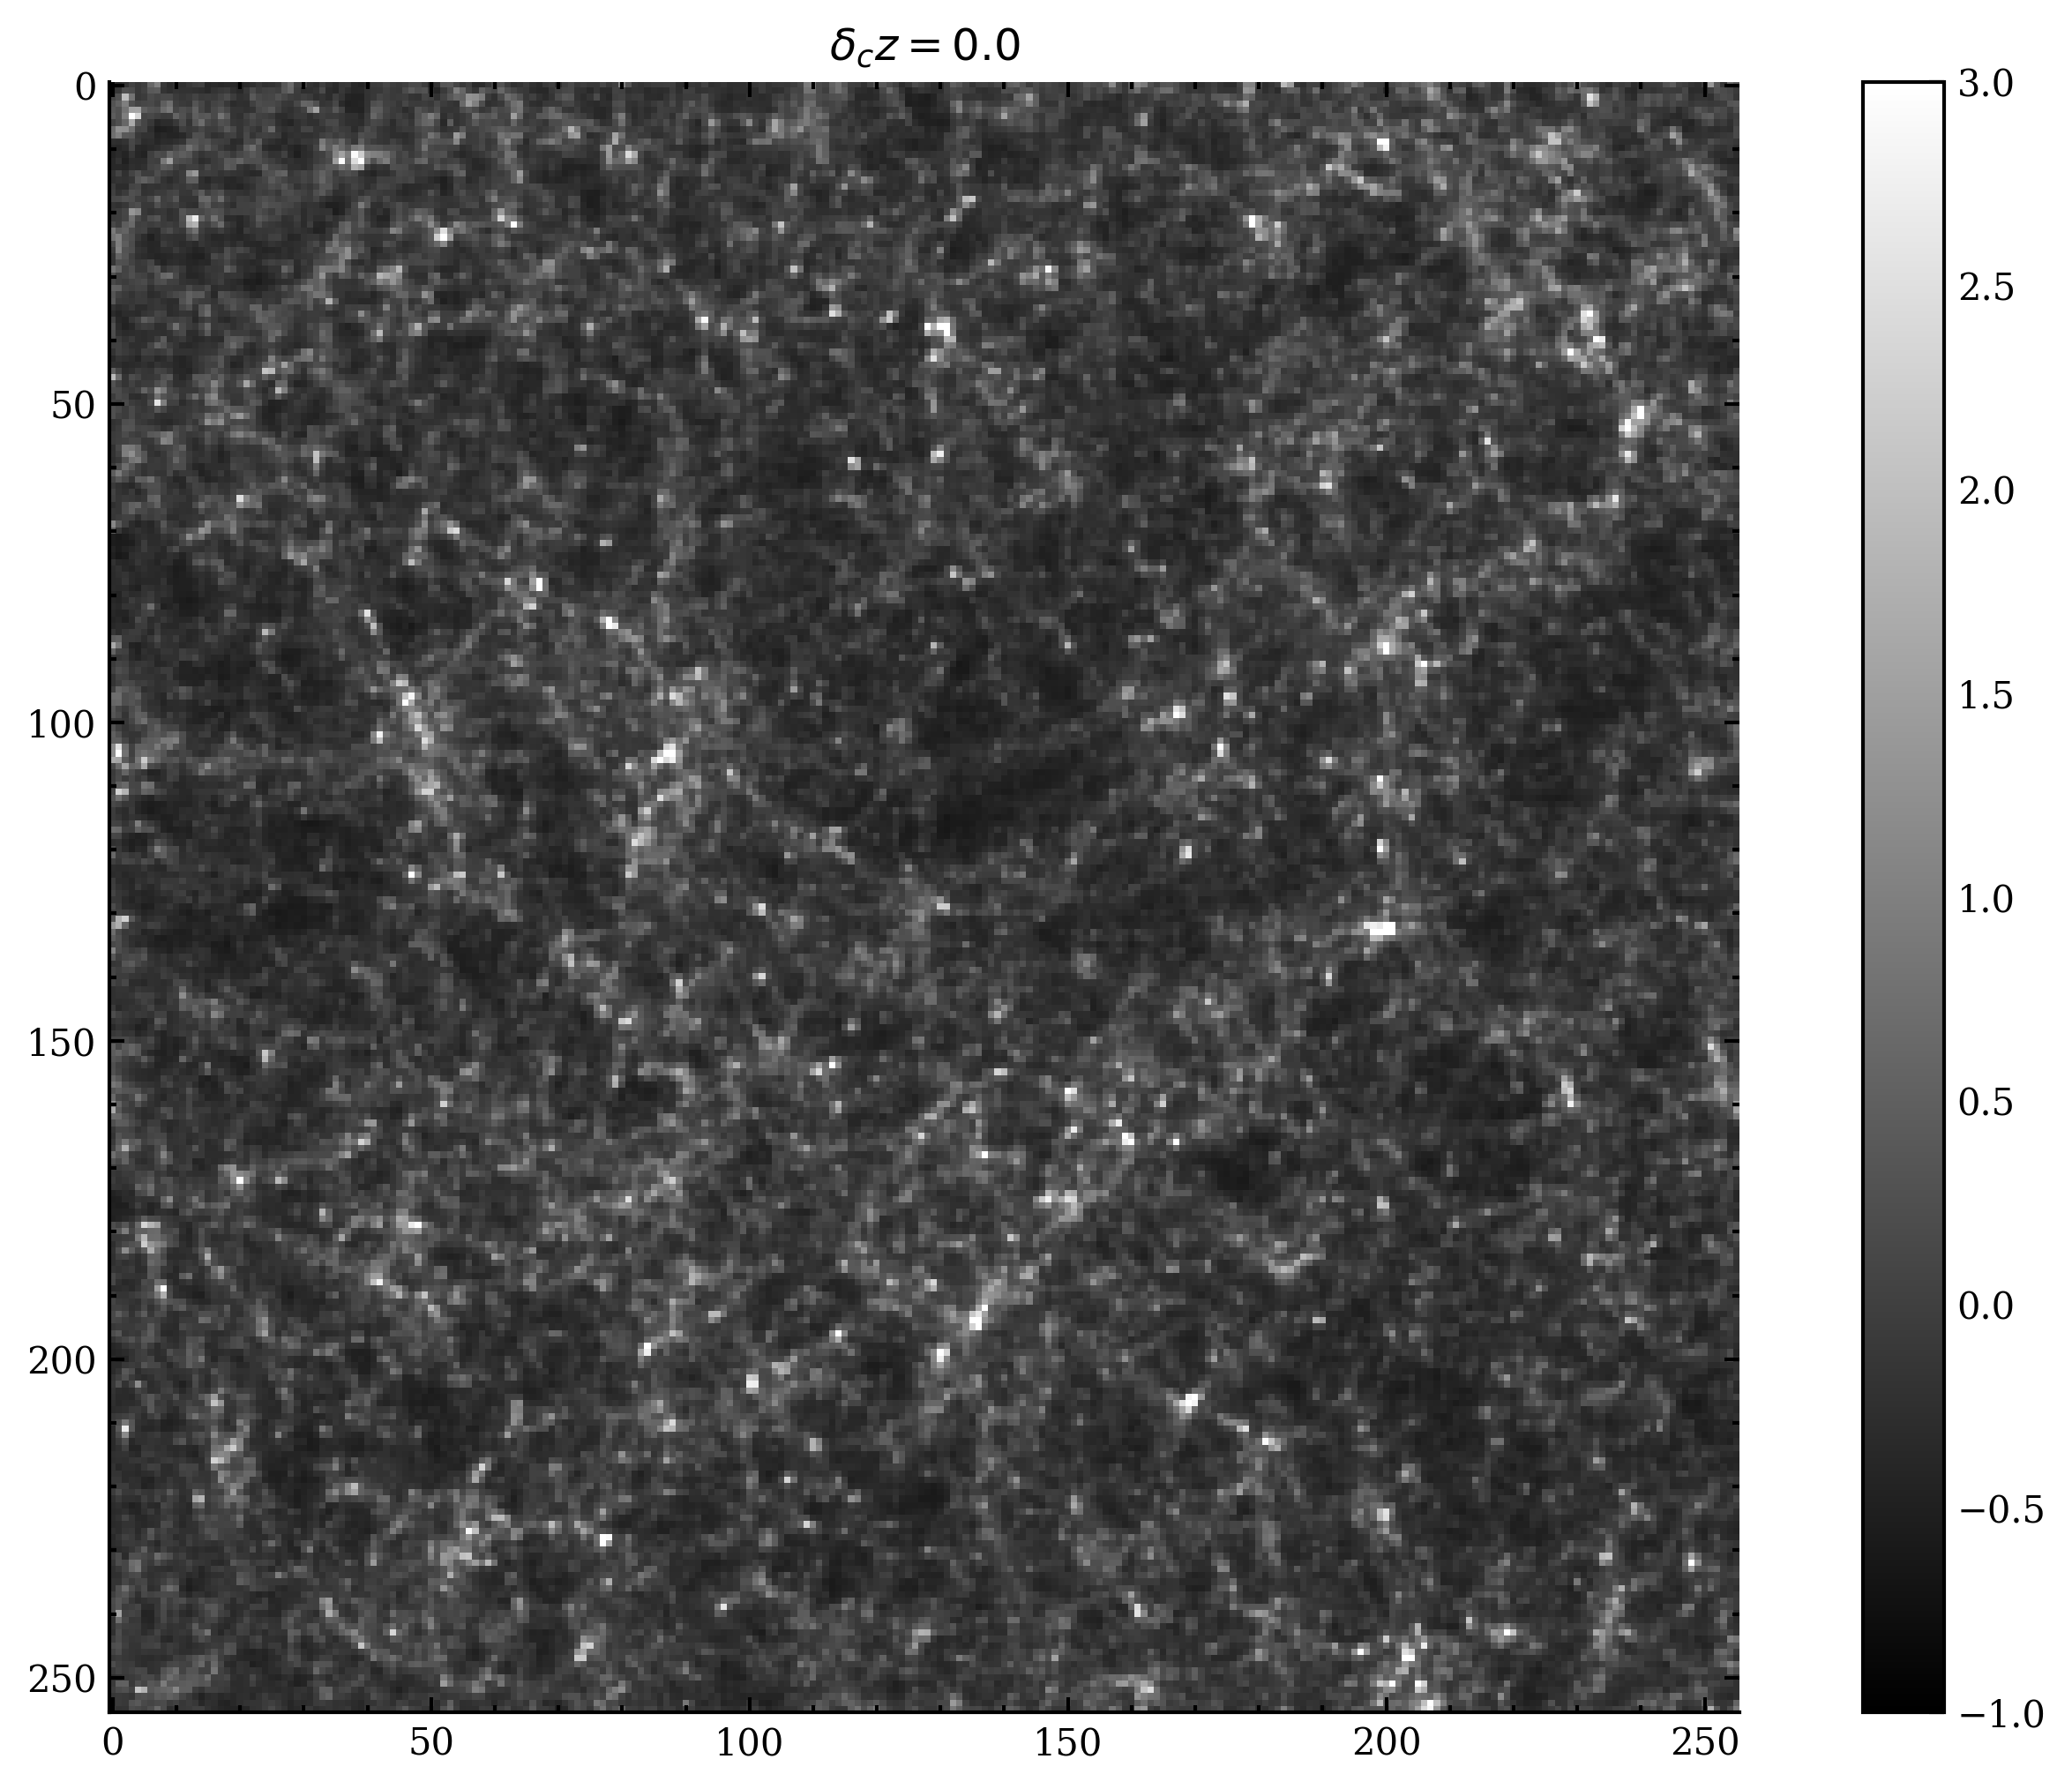

In [11]:
# 绘制密度场
Redshift = '0.000'
delta_c,n = loadfield3d(Path + Dir + Redshift + '_delta_c_1.bin')
plt.figure()
plt.imshow(np.mean(delta_c[:, :, :], axis=2).reshape(n, n).T, cmap='gray')

plt.colorbar()
plt.clim(-1, 3)
plt.title('$\delta_c z=0.0$')
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_24483/4025610729.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_c z=0.0$')


/mnt/18T/cube/usr_out/cbh/500_256//image1/0.000_delta_c_1.bin 256


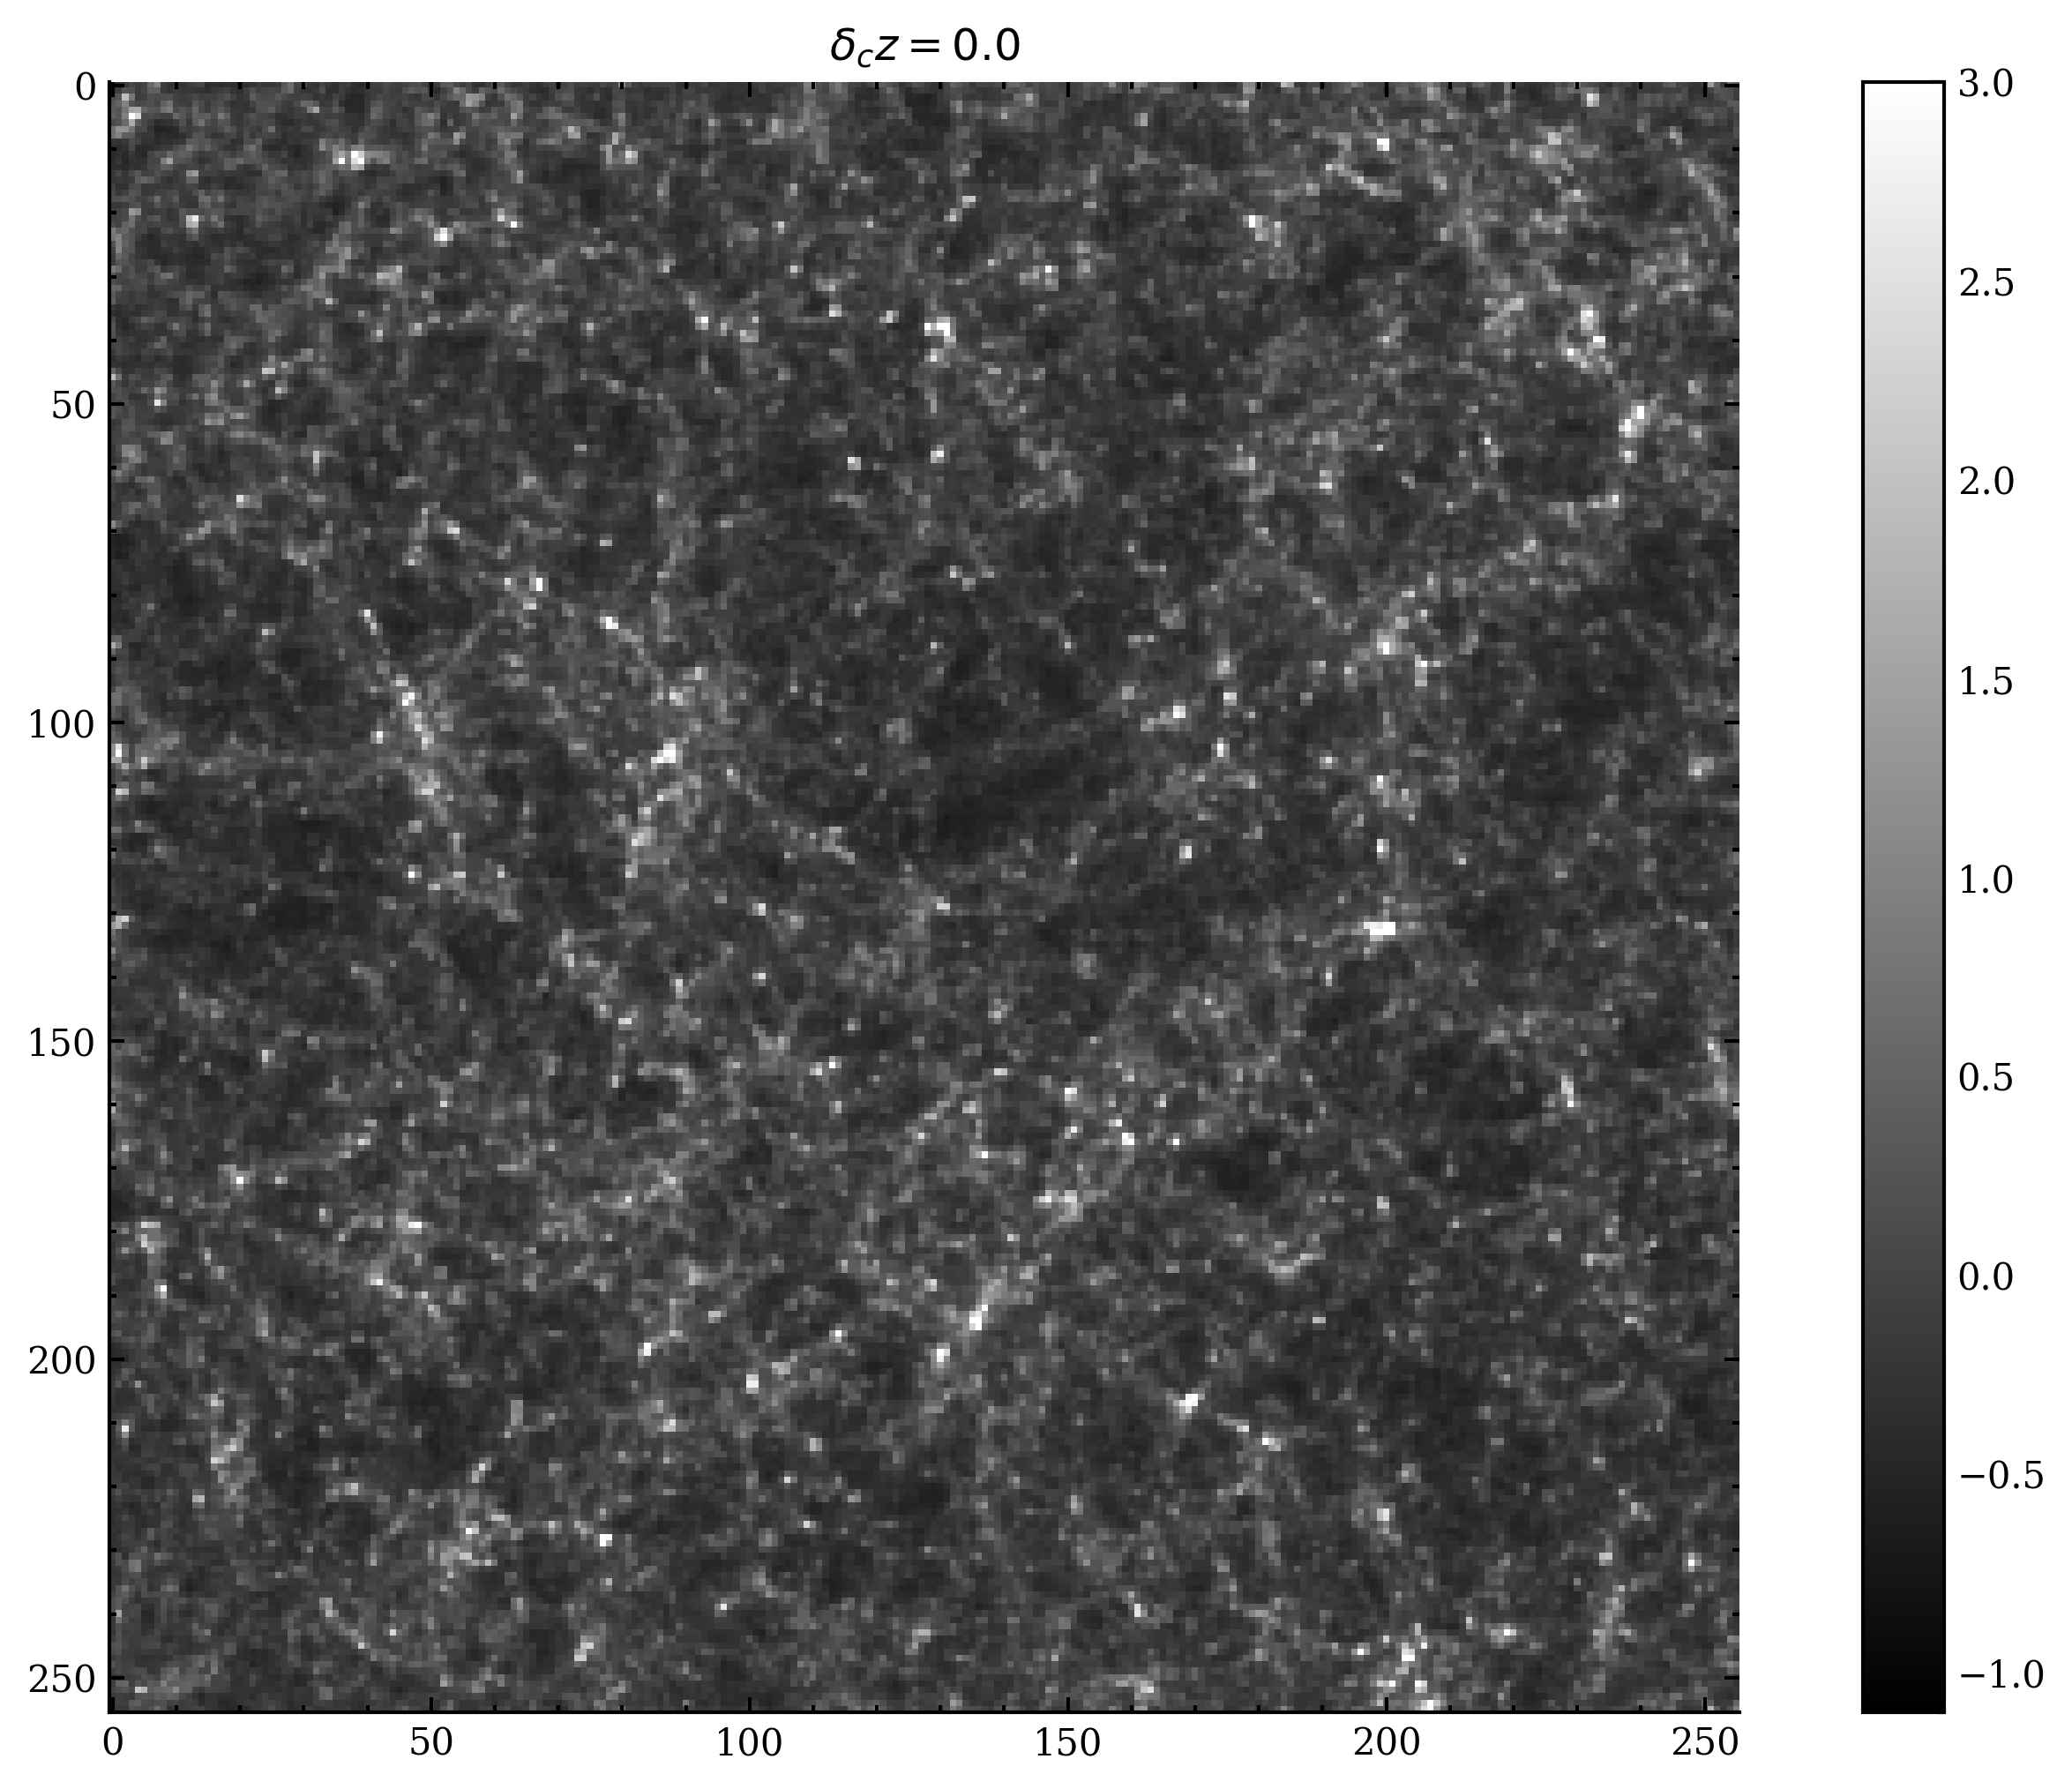

In [13]:
# 绘制密度场
Redshift = '0.000'
delta_c,n = loadfield3d(Path + Dir + Redshift + '_delta_c_1.bin')
plt.figure()
plt.imshow(np.mean(delta_c[:, :, :], axis=2).reshape(n, n).T, cmap='gray')

plt.colorbar()
plt.clim(3, -1)
plt.title('$\delta_c z=0.0$')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_24483/2228491552.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_L$')


/mnt/18T/cube/usr_out/cbh/500_256//image1/delta_L_1.bin 256


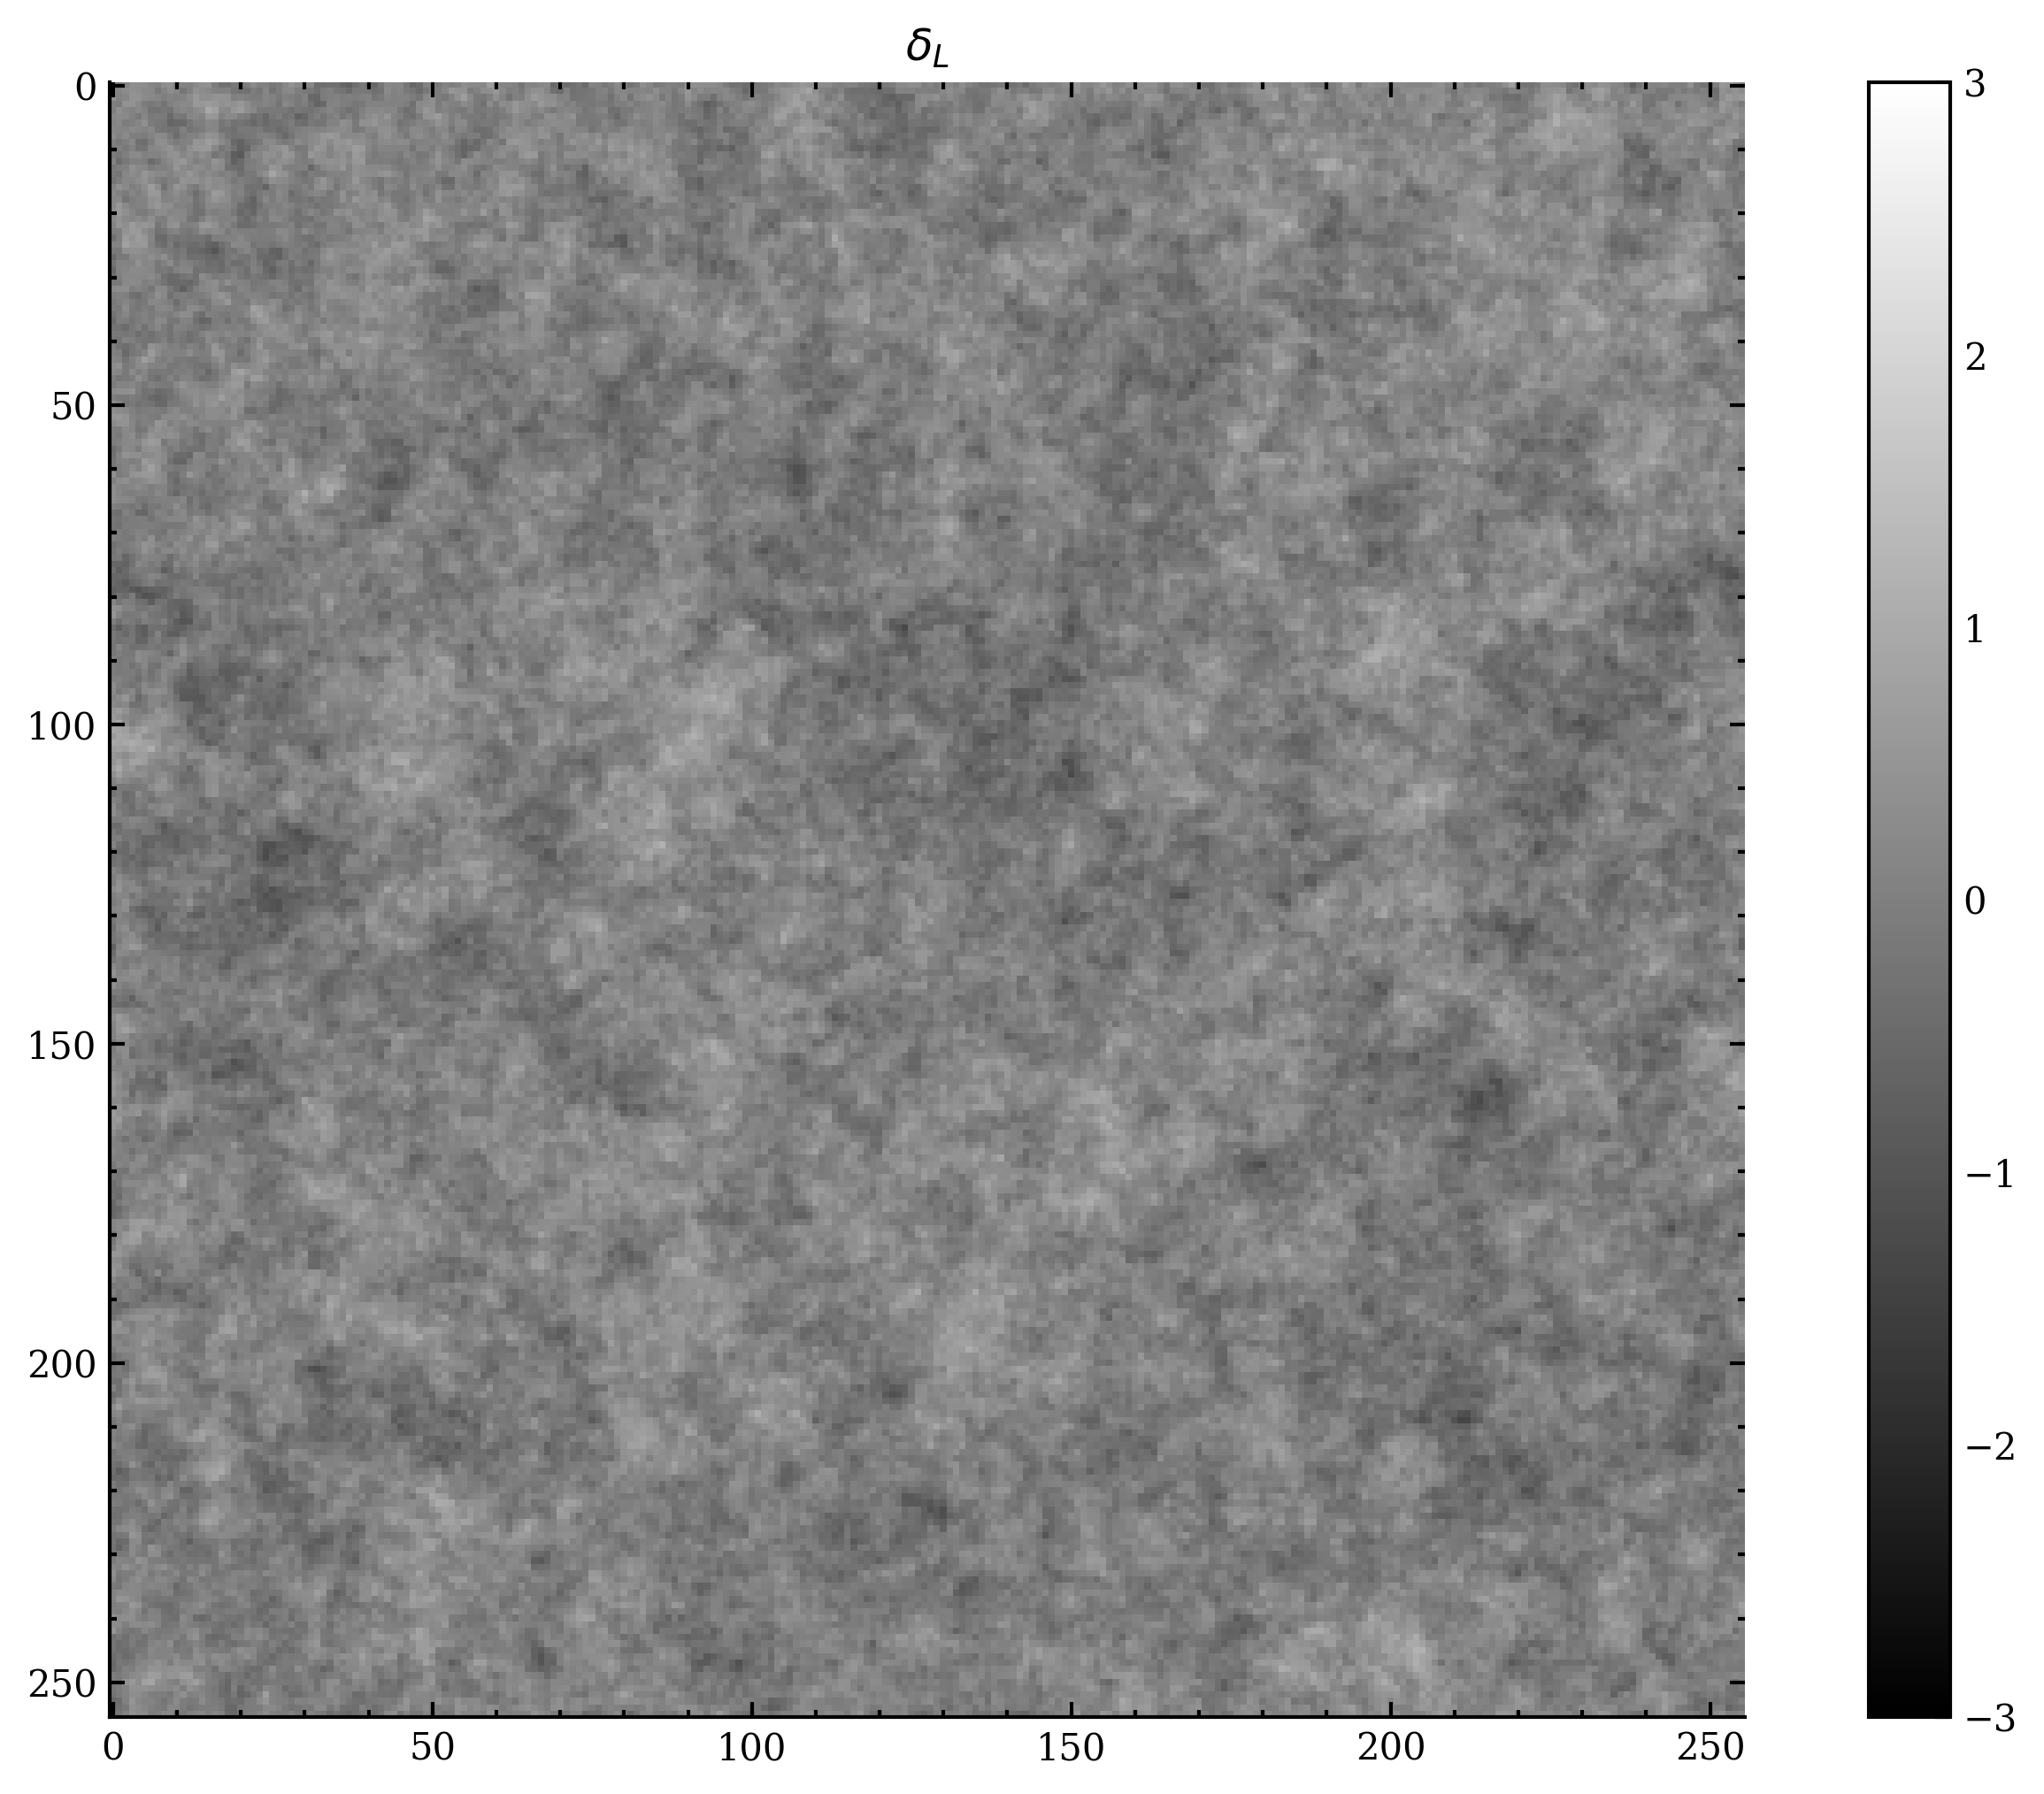

In [8]:
# 绘制初始场
delta_L,n = loadfield3d(Path + Dir + 'delta_L_1.bin')
plt.figure()
plt.imshow(np.mean(delta_L[:, :, :], axis=2).reshape(n, n).T, cmap='gray')

plt.colorbar()
plt.clim(-3, 3)
plt.title('$\delta_L$')
plt.show()

In [ ]:
# 绘制phi
Redshift = '200.000'
phi = loadfield3d(Path + Dir + Redshift + '_phi1_1.bin')
plt.figure()
plt.imshow(np.mean(phi[:, :, :], axis=2).reshape(ng, ng).T, cmap='gray')

plt.colorbar()
plt.title('$\delta_c$')
plt.show()

for i in range(1, n_checkpoint):
    Redshift = format(z[i], '.3f')
    proj_xy = loadfield2d(Path + Dir + Redshift + '_proj_xy_1.bin')
    plt.figure()
    plt.imshow(proj_xy.T, cmap='gray', extent=[xgrid[0], xgrid[1], xgrid[0], xgrid[1]])
    
    plt.colorbar()
    plt.clim(-1, 5)

In [ ]:
# 时间统计
def loadtcat(filename):
    with open(filename, 'rb') as fid:
        nstep = np.fromfile(fid, dtype=np.int32, count=1)[0]
        tcat0 = np.fromfile(fid, dtype=np.float32, count=100)
        tcat = np.fromfile(fid, dtype=np.float32, count=100 * nstep)
        tcat = tcat.reshape(nstep,100).T
    
    return nstep, tcat0, tcat

nsnap_read = [100,98,96,95,92,84,81,72,66,38,1]
for isnap in range(len(nsnap_read)):
    Redshift = '{:.3f}'.format(z[int(nsnap_read[isnap])])
    nstep1, tcat0, tcat1 = loadtcat(Path + Dir + Redshift + '_tcat_1.bin')
    for i in range(1, nstep1-1):
        for j in range(100):
            if tcat1[j, i] < 0:
                tcat1[j, i] = np.mean(tcat1[j, [i-1, i+1]])
    
    if isnap == 0:
        tcat = tcat1
        nstep = nstep1
    else:
        n = tcat1.size // 100
        tcat[:, :n-1] = tcat1[:, :n-1]

for i in range(1, nstep-1):
    for j in range(100):
        if tcat[j, i] == 0:
            tcat[j, i] = np.mean(tcat[j, [i-1, i+1]]) 
            if j == 99:
                tcat[j, i] = tcat[j, i] + 180

istep = np.arange(1, nstep-2).T
tcat[99 , nstep-3] = tcat[99, nstep-3] + 180
tcat[50:52, :] = tcat[50:52 , :] - 1
# tcat[99,3445] = np.mean(tcat[99,3440:3449])
# tcat[99,3449] = np.mean(tcat[99,3445:3455])
tcat = tcat.T
print('compute time: %d days'%((sum(tcat[:,99]))/3600/24))

# 绘图部分  
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(istep, tcat[ :nstep-3, 42], label='$scale\,factor\,a+{ d}a$', linewidth=0.5)
plt.plot(istep, tcat[ :nstep-3, 50], label='$memory\, overhead\,\delta_{ node}$', linewidth=0.5)
plt.plot(istep, tcat[ :nstep-3, 51], label='$memory\,overhead\,\delta_{ tile}$', linewidth=0.5)
plt.grid(True, which='both', linestyle='dotted', linewidth=0.3)
plt.xlabel('timestep')
plt.ylabel('')
plt.legend(loc='upper left')
plt.xlim(0, nstep-3)
plt.title('memory')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.subplot(2, 1, 2)
plt.plot(istep, tcat[ :nstep-3, 10], label='PM1', linewidth=0.5)
plt.plot(istep, tcat[ :nstep-3, 11], label='PM2', linewidth=0.5)
plt.plot(istep, tcat[ :nstep-3, 12], label='PM3', linewidth=0.5)
plt.plot(istep, tcat[ :nstep-3, 13], label='PM1', linewidth=0.5)
plt.plot(istep, tcat[ :nstep-3, 1], label='drift', linewidth=0.5)
plt.plot(istep, tcat[ :nstep-3, 99], label='$\sum$', linewidth=0.5)
plt.grid(True, which='both', linestyle='dotted', linewidth=0.3)
plt.xlabel('timestep')
plt.ylabel('time/sec')
plt.legend(loc='upper left')
plt.xlim(0, nstep-3)
plt.title('time')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.tight_layout()
savename = Path+'/fig/tcat_%.3f.jpg'%z[int(max(nsnap_read))]
plt.savefig(savename, format='jpeg')
plt.show()


In [ ]:
# 绘制密度场
from scipy.ndimage import zoom
# delta_L,ng = loadfield3d('../output/canp600_512_1_0.0_1/image1/25.000_delta_c_1.bin')

delta_L_resampled = zoom(delta_L, nw/ng, order=1)  # order=1 表示线性插值

difference = delta_L_resampled - delta_C
plt.figure()
plt.imshow(np.mean(delta_L[:, :, :], axis=2).reshape(ng, ng).T, cmap='gray')

plt.colorbar()
plt.clim(-3, 3)
plt.title('$\delta_cicpower z=25.0$')
plt.show()

plt.figure()
plt.imshow(np.mean(delta_L_resampled[:, :, :], axis=2).reshape(nw, nw).T, cmap='gray')

plt.colorbar()
plt.clim(-3, 3)
plt.title('$\delta_cicpower_zoom z=25.0$')
plt.show()

delta_C,nw = loadfield3d('../output/canp600_512_1_0.0_1/image1/25.000_delta_coarse_1.bin')
plt.figure()
plt.imshow(np.mean(delta_C[:, :, :], axis=2).reshape(nw, nw).T, cmap='gray')

plt.colorbar()
plt.clim(-3, 3)
plt.title('$\delta_courese z=25.0$')
plt.show()


In [ ]:
from scipy.ndimage import zoom

delta_L_resampled = zoom(delta_L, nw/ng, order=1)  # order=1 表示线性插值

difference = delta_L_resampled - delta_C
plt.figure()
plt.imshow(np.mean(difference[:, :, :], axis=2).reshape(nw, nw).T, cmap='gray')

plt.colorbar()
# plt.clim(-3, 3)
plt.title('$difference z=25.0$')
plt.show()

plt.figure()
plt.imshow(np.mean(difference[:, :, :]/delta_C-1, axis=2).reshape(nw, nw).T, cmap='gray')

plt.colorbar()
plt.clim(-1, 1)
plt.title('$diff z=25.0$')
plt.show()

In [ ]:
# 绘制密度场
Redshift = '200.000'
delta_L,nc = loadfield3d('/home/cbh/visualization/plane/rhoc.bin')
plt.figure()
plt.imshow(np.mean(delta_L[:, :, :], axis=2).reshape(nc, nc).T, cmap='gray')

plt.colorbar()
# plt.clim(0, 5)
plt.title('$\delta_{NFW}$')
plt.show()

In [8]:
import numpy as np
import matplotlib.pylab as plt

ng = 256/4
nnt= 4
nt = int(ng/nnt)
rhoc1=np.reshape(np.array(np.fromfile(f'../output/gpower_600_256_1_0.1_2/image1/0.020_rho_c1_1.bin', dtype='int32',count=nt**3*nnt**3)),(nnt,nnt,nnt,nt,nt,nt))
rhoc2=np.reshape(np.array(np.fromfile(f'../output/gpower_600_256_1_0.1_2/image1/0.020_rho_c2_1.bin', dtype='int32',count=nt**3*nnt**3)),(nnt,nnt,nnt,nt,nt,nt))

drhoc=rhoc1/rhoc2-1
print(np.max(drhoc),np.min(drhoc),np.mean(drhoc),np.sum(rhoc1),np.sum(rhoc2))

0.0 0.0 0.0 16777216 16777216


In [28]:
# 加载3d场
def loadfield3d(fn):
    """
    fn: filename
    Returns:
    a: 3D field
    """
    fid = open(fn, 'rb')
    p1 = np.fromfile(fid, dtype=np.float32)  # real*4
    fid.close()
    n = round(len(p1) ** (1/3))
    a = np.reshape(p1, (n, n, n))
    print(fn,n)
    return np.array(a),n

delta_1,nc = loadfield3d('../output/gpower_600_256_1_0.1_2/image1/0.020_delta_global1_1.bin')
delta_2,nc = loadfield3d('../output/gpower_600_256_1_0.1_2/image1/0.020_delta_global2_1.bin')

../output/gpower_600_256_1_0.1_2/image1/0.020_delta_global1_1.bin 512
../output/gpower_600_256_1_0.1_2/image1/0.020_delta_global2_1.bin 512


In [9]:
# 绘制密度场
plt.figure()
plt.imshow(np.mean(delta_1[:, :, :], axis=2).reshape(nc, nc).T, cmap='gray')

plt.colorbar()
# plt.clim(0, 5)
plt.title('$\delta_{NFW}$')
plt.show()

plt.figure()
plt.imshow(np.mean(delta_2[:, :, :], axis=2).reshape(nc, nc).T, cmap='gray')

plt.colorbar()
# plt.clim(0, 5)
plt.title('$\delta_{NFW}$')
plt.show()



<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1507771/1870671772.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_{NFW}$')
/tmp/ipykernel_1507771/1870671772.py:17: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_{NFW}$')


../output/gpower_600_256_1_0.1_2/image1/0.020_delta_global1_1.bin 512


/tmp/ipykernel_1507771/1870671772.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_{NFW}$')
/tmp/ipykernel_1507771/1870671772.py:17: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_{NFW}$')


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1507771/155833074.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_{NFW}$')
/tmp/ipykernel_1507771/155833074.py:15: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_{NFW}$')


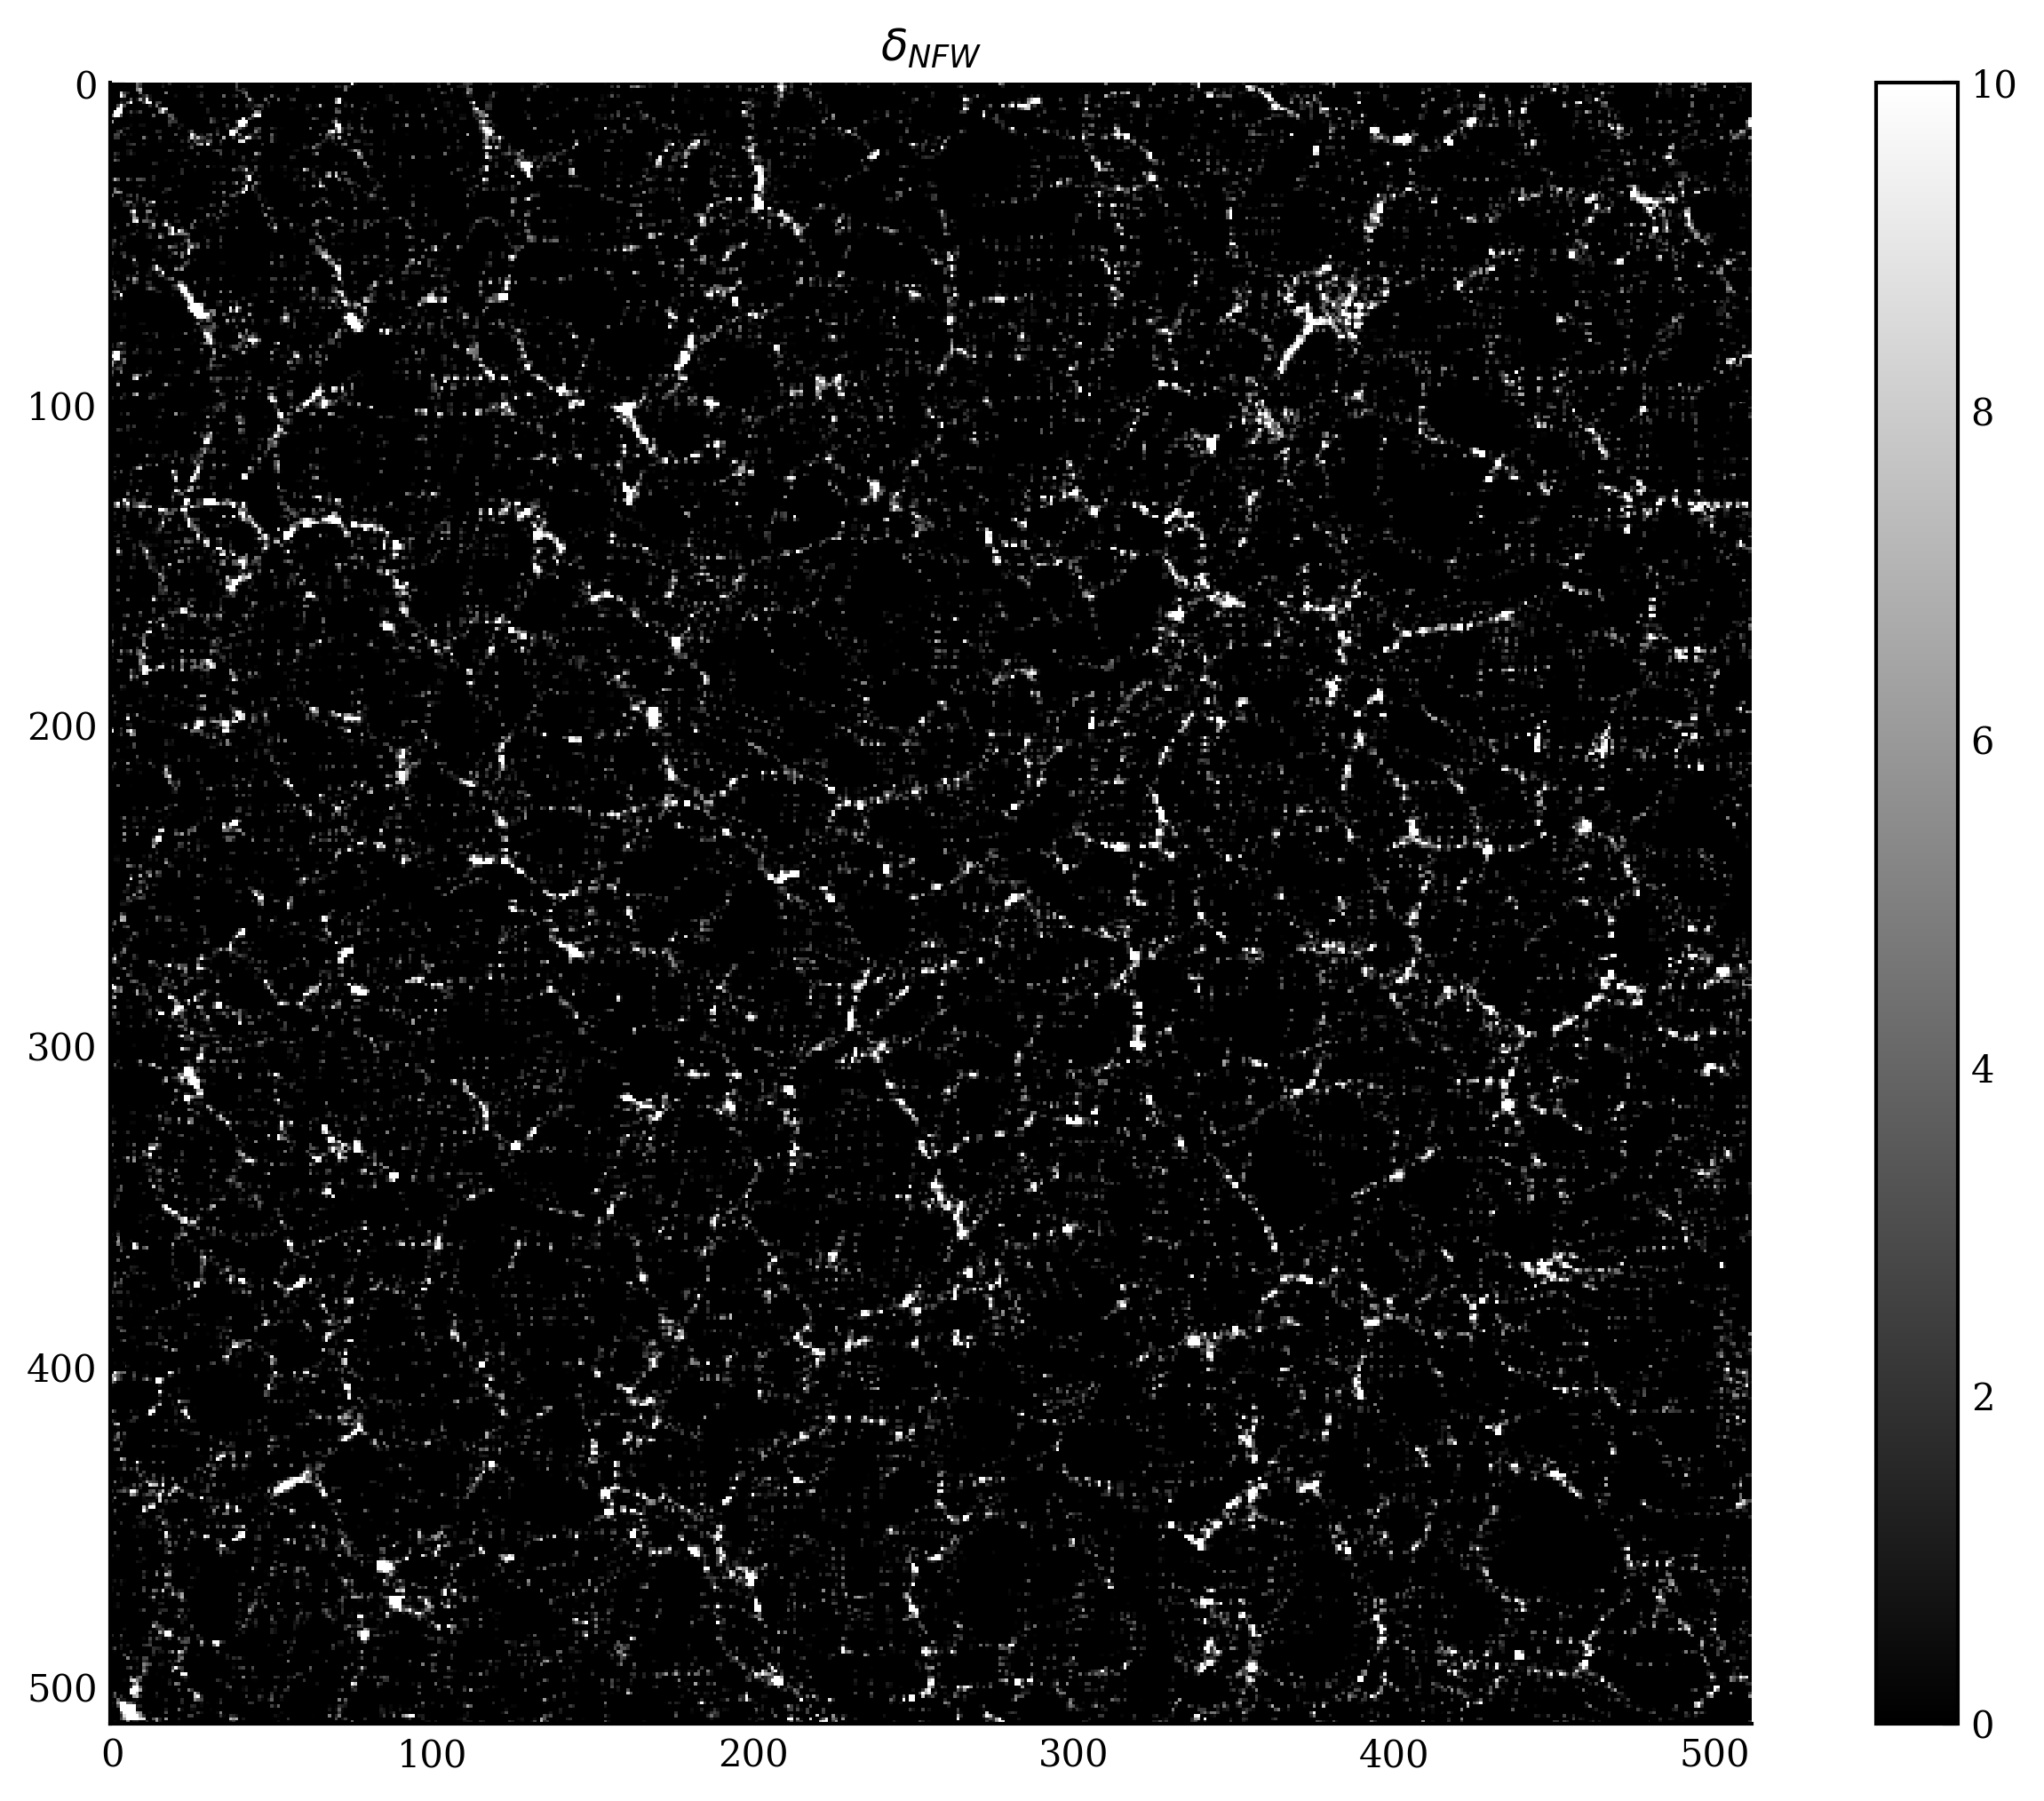

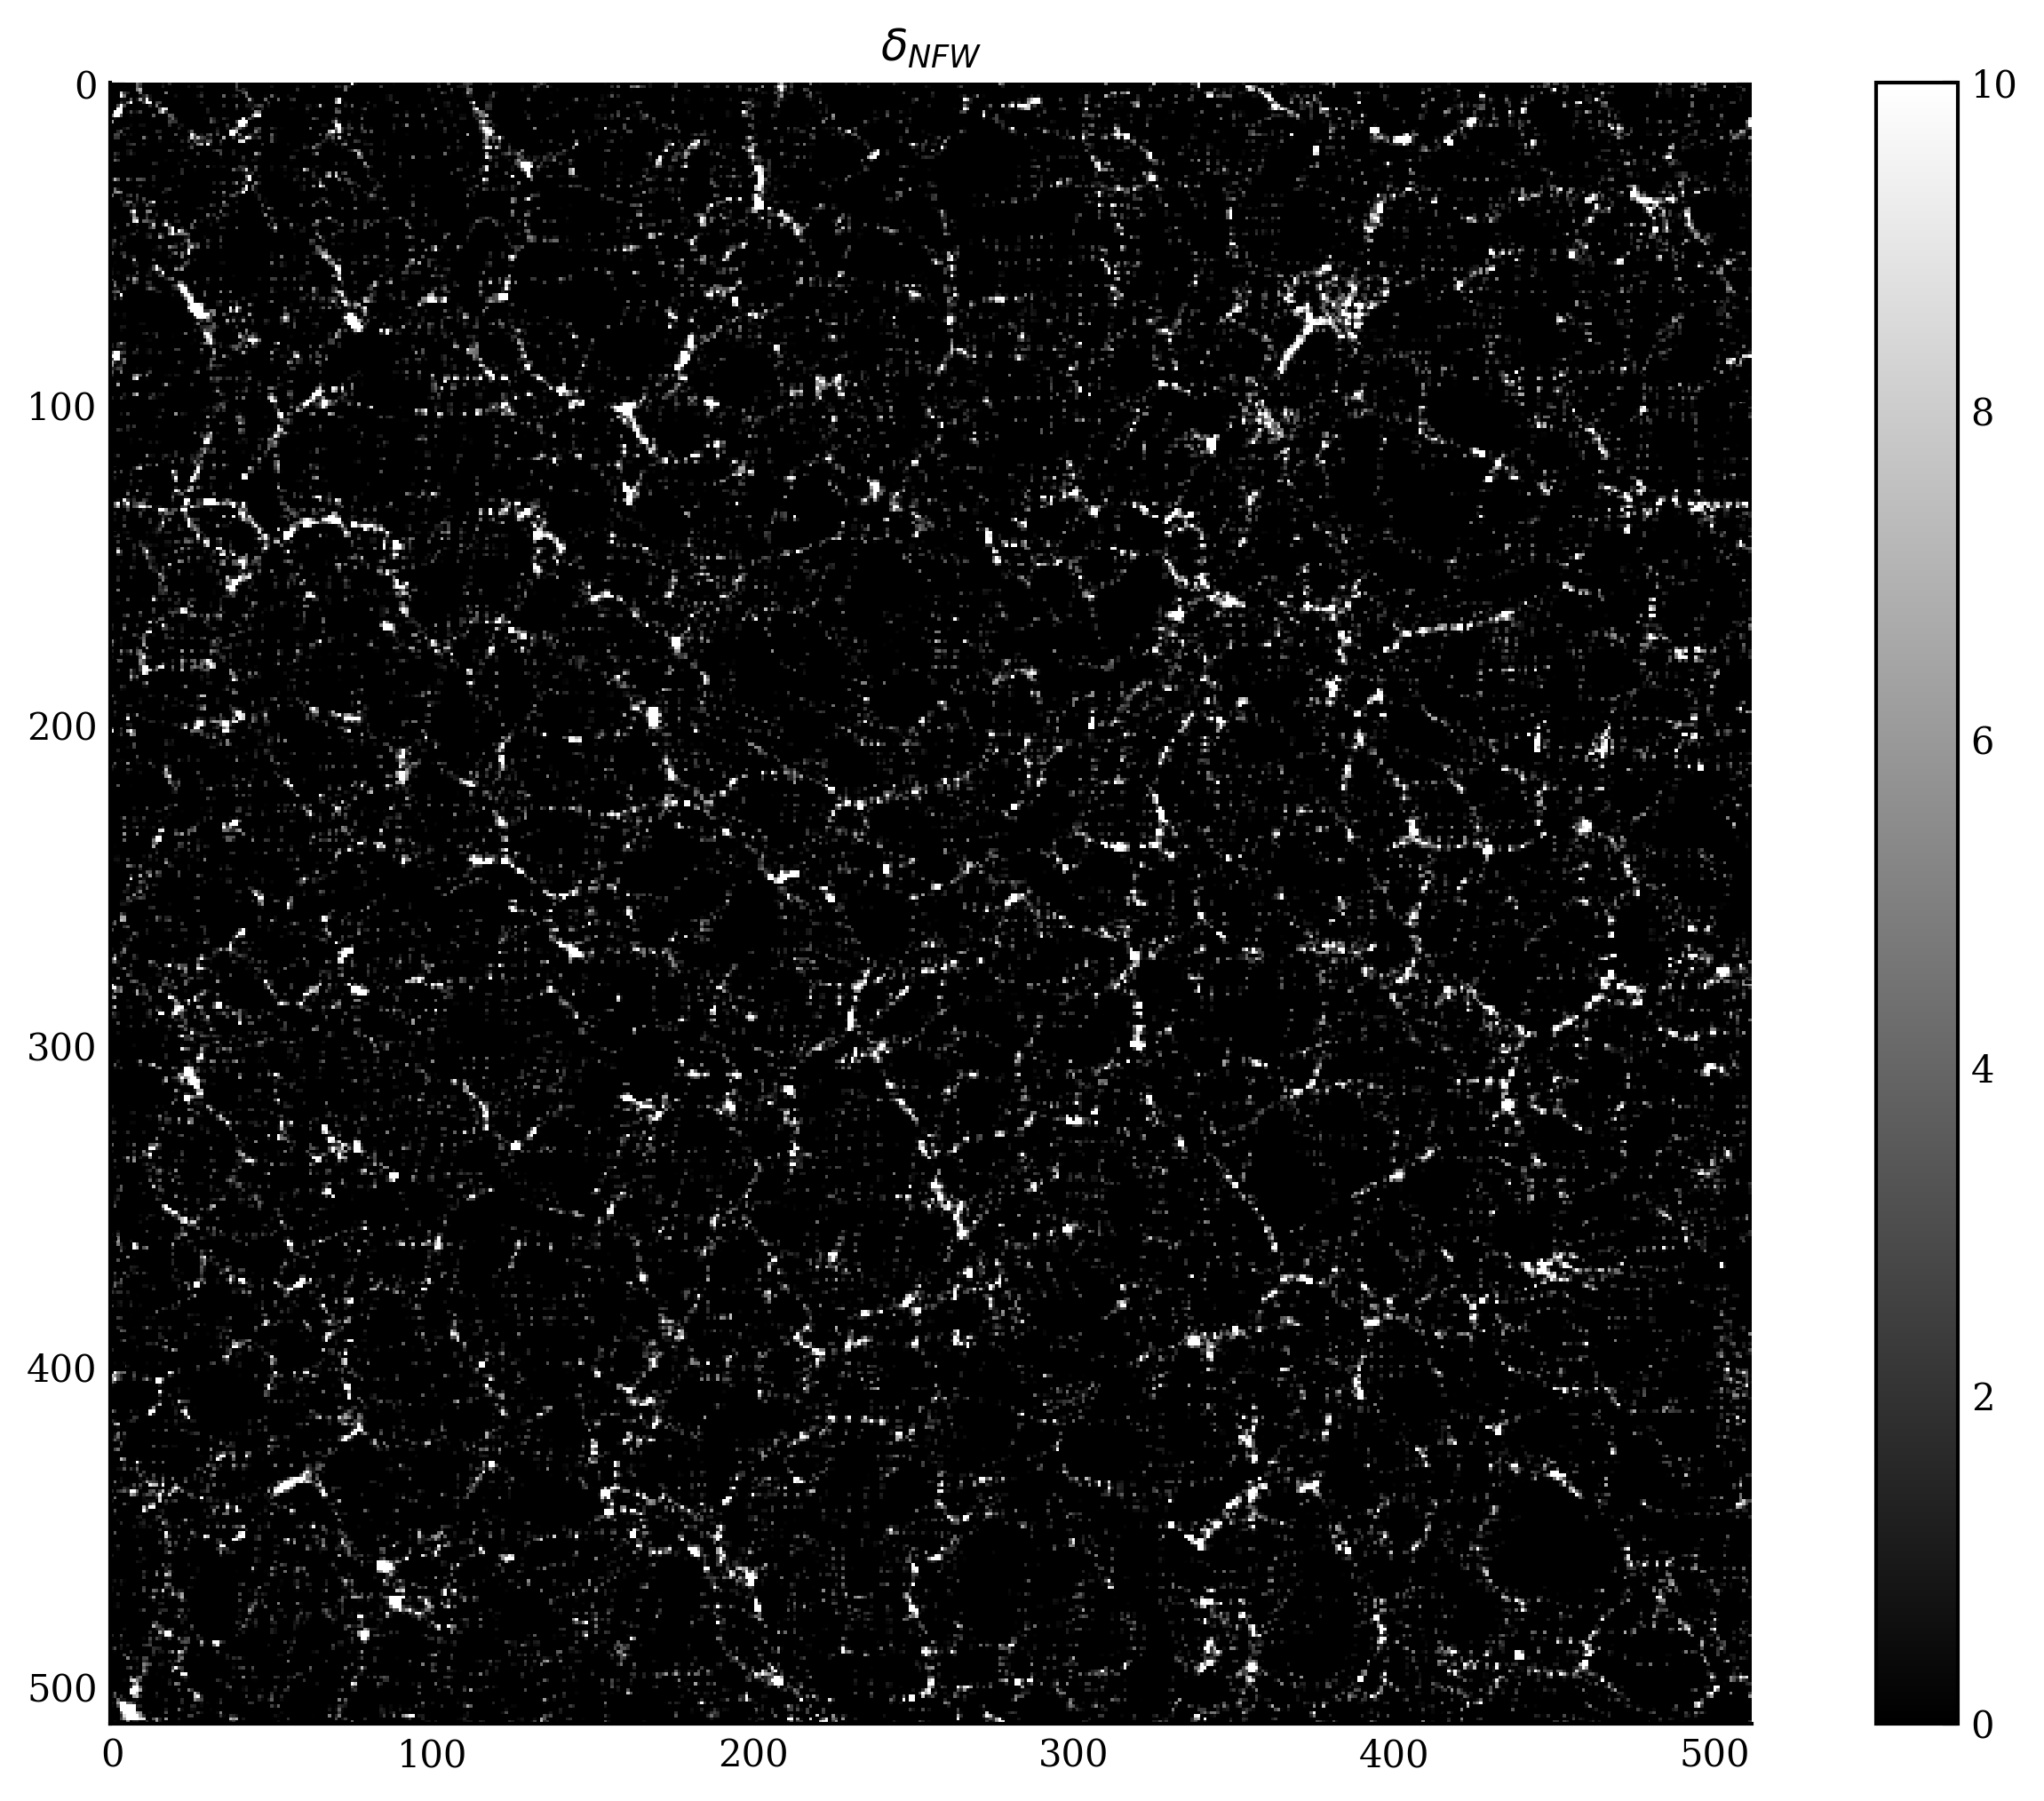

In [29]:

ni=1#int(nc/4)
plt.figure()
plt.imshow(delta_1[ni, :, :], cmap='gray')

plt.colorbar()
plt.clim(0, 10)
plt.title('$\delta_{NFW}$')
plt.show()

plt.figure()
plt.imshow(delta_2[ni, :, :], cmap='gray')

plt.colorbar()
plt.clim(0, 10)
plt.title('$\delta_{NFW}$')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1507771/3954476021.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.title('$\delta_{NFW}$')
/tmp/ipykernel_1507771/3954476021.py:1: RuntimeWarning: invalid value encountered in divide
  ddelta=delta_1/delta_2-1


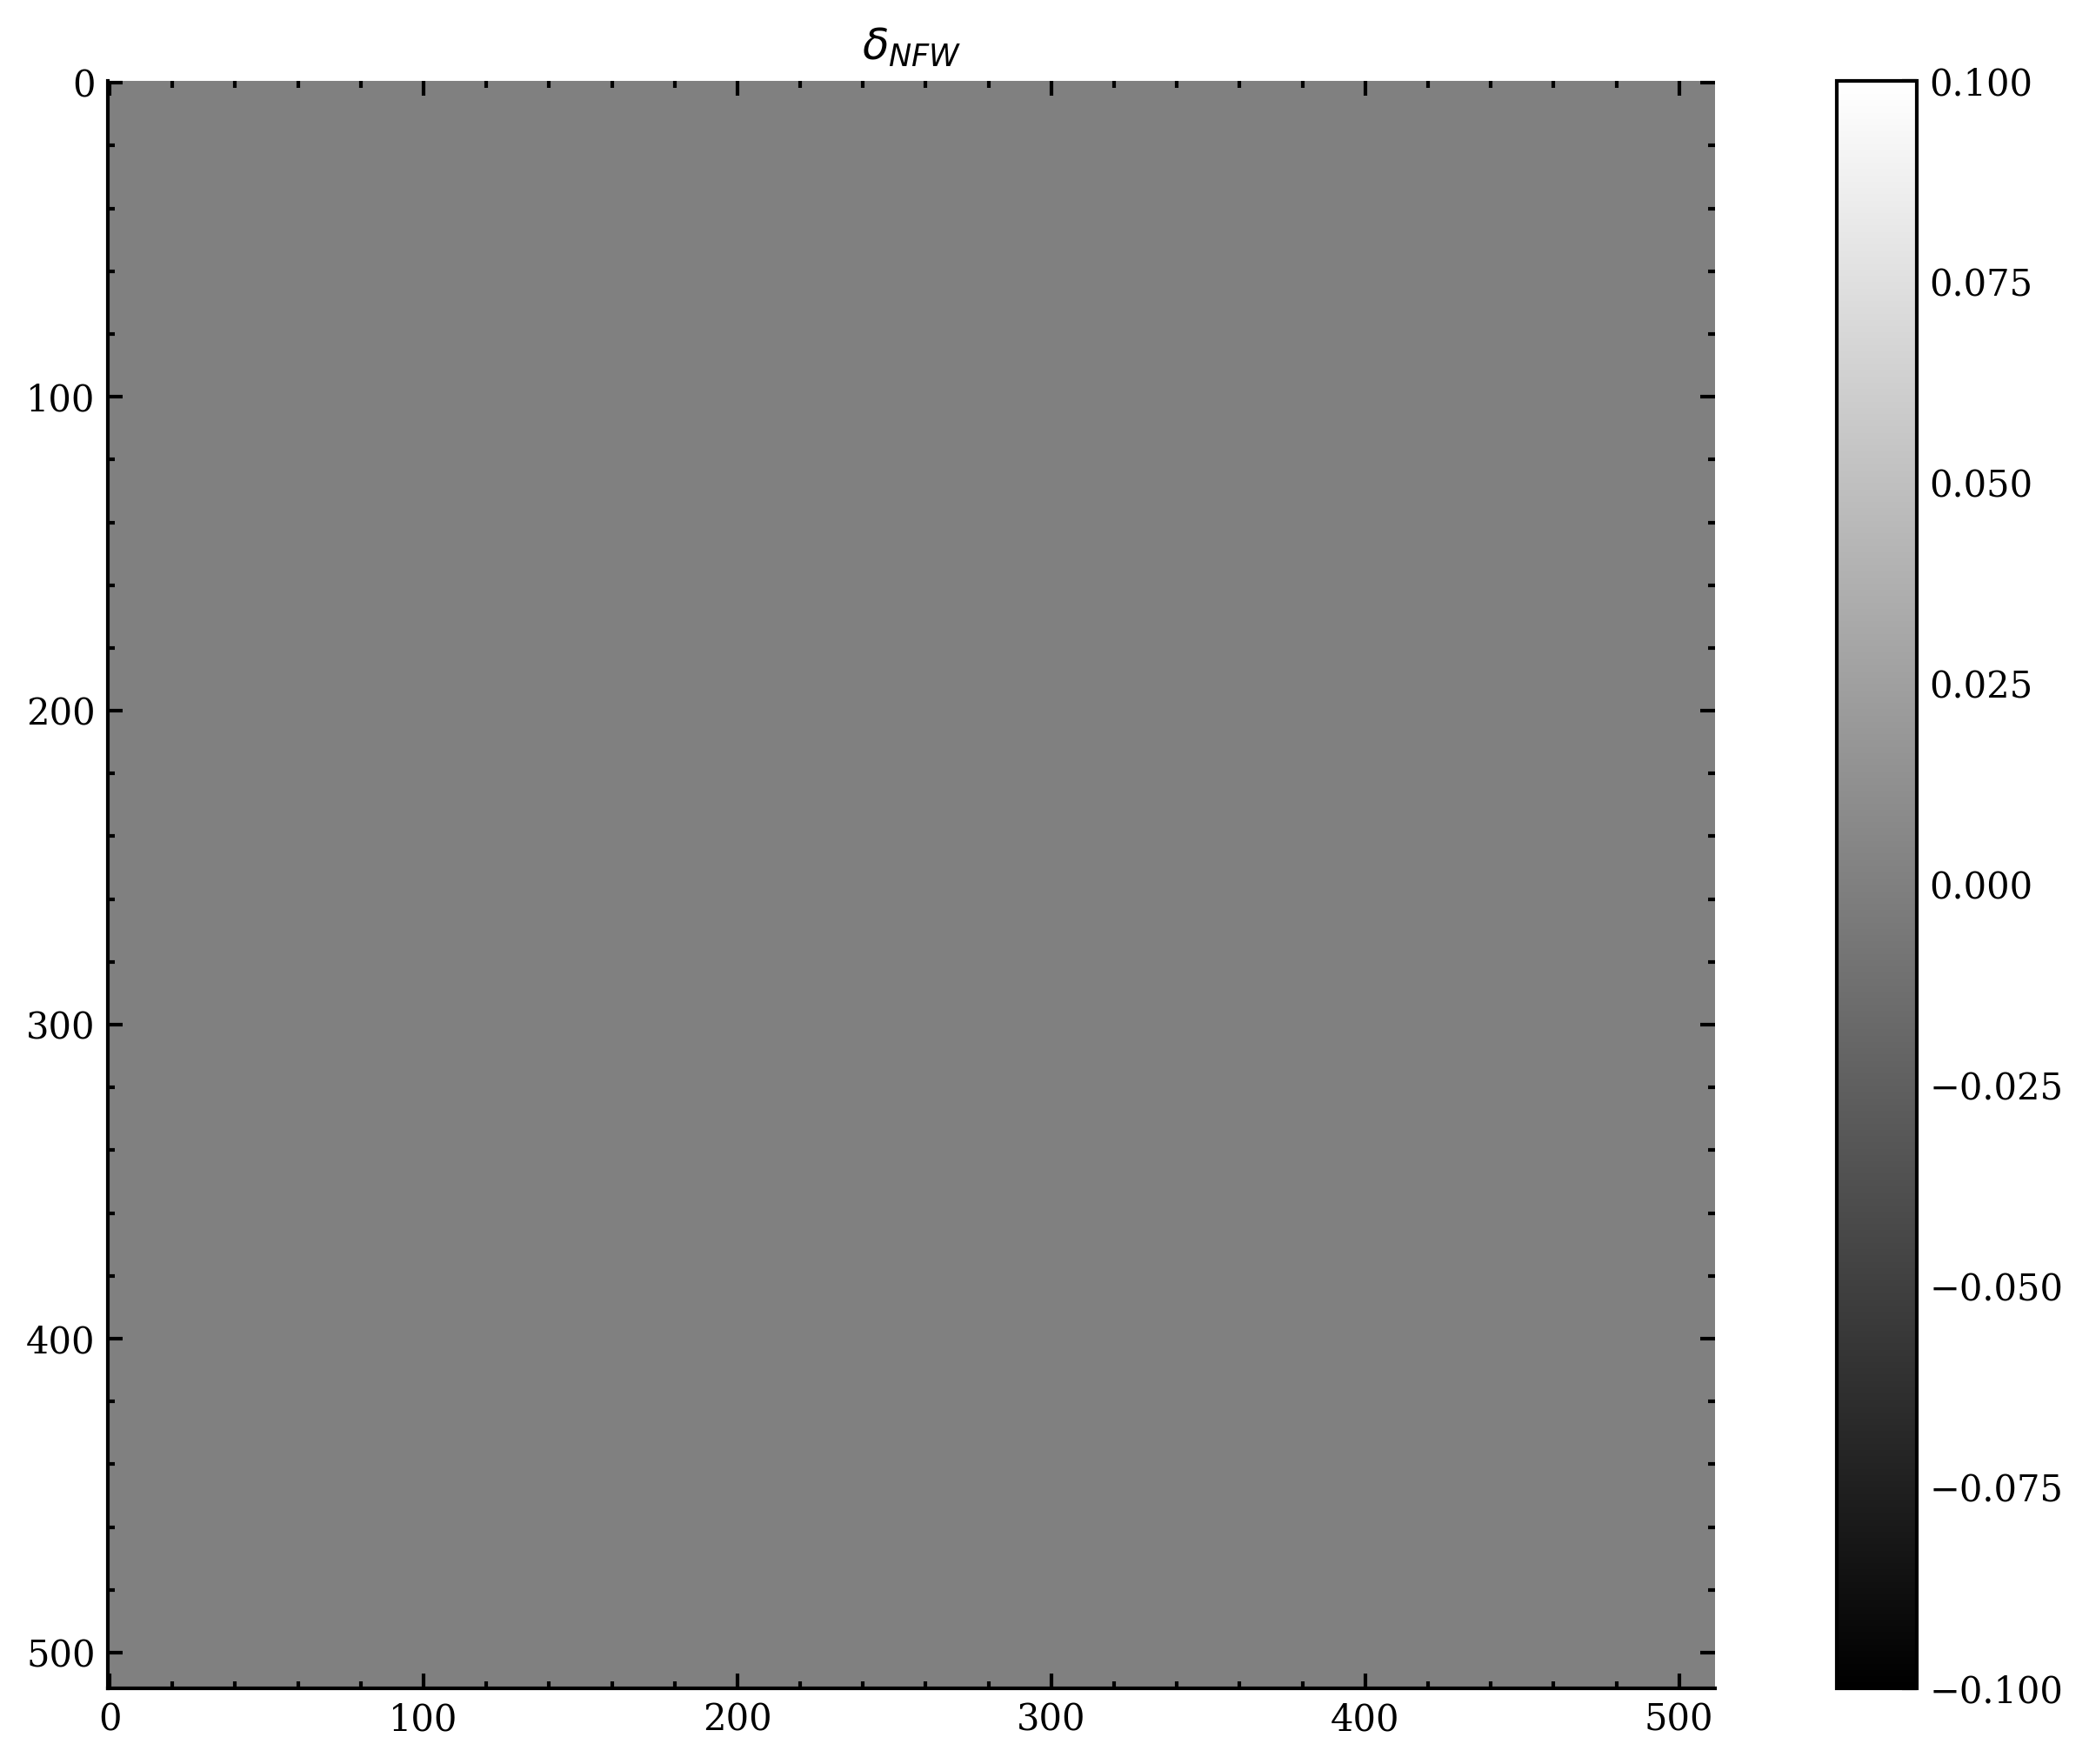

In [31]:
ddelta=delta_1/delta_2-1
plt.figure()
plt.imshow(ddelta[:, :, ni], cmap='gray')

plt.colorbar()
# plt.clim(-1, 5)
plt.title('$\delta_{NFW}$')
plt.show()

In [ ]:
import os

# 指定目标文件夹路径
folder_path = "../output/IH600_256_1_0.1_1/image1/"

def change_files_name()
    # 遍历文件夹中的所有文件
    for filename in os.listdir(folder_path):
        # 检查文件名是否符合 xxx_87.bin 的格式
        if filename.endswith("_87.bin"):
            # 构造新的文件名
            new_filename = filename.replace("_87.bin", "_1.bin")
            # 获取完整路径
            old_file_path = os.path.join(folder_path, filename)
            new_file_path = os.path.join(folder_path, new_filename)
            # 重命名文件
            os.rename(old_file_path, new_file_path)
            print(f"已重命名: {filename} -> {new_filename}")

print("批量修改完成！")